# PROYECTO INGEMMET: APLICACIÓN DE PHREEQC Y R PARA SISTEMAS HIDROGEOQUÍMICOS PERUANOS

## EXPLORACIÓN DE LA PAQUETERÍA DE PHREEQC EN R

#### Instalando el PHREEQC en el Notebook

In [2]:
library(phreeqc)

#### Instalando las paqueterías de visualización en el Notebook

In [4]:
library(ggplot2)

In [8]:
# Cargando la base de datos 'phreeqc.dat'
phrLoadDatabaseString(phreeqc.dat)

In [9]:
# Corriendo el ejemplo 2
phrRunString(ex2)

In [14]:
# Recuperando la salida seleccionada 'selected_output' como una lista de data.frame
so <- phrGetSelectedOutput()

In [18]:
head(so$n1)

sim state  soln dist_x time step pH       pe       temp.C. si_anhydrite
1 1   i_soln 1    NA     NA   NA   7.000000  4.00000 25              NA  
2 1   react  1    NA      0    1   7.066055 10.74462 25      -0.3044769  
3 1   react  1    NA      0    2   7.052400 10.67567 26      -0.2934847  
4 1   react  1    NA      0    3   7.038845 10.60683 27      -0.2825415  
5 1   react  1    NA      0    4   7.025398 10.53890 28      -0.2716468  
6 1   react  1    NA      0    5   7.012061 10.47196 29      -0.2608000  
  si_gypsum
1 NA       
2  0       
3  0       
4  0       
5  0       
6  0

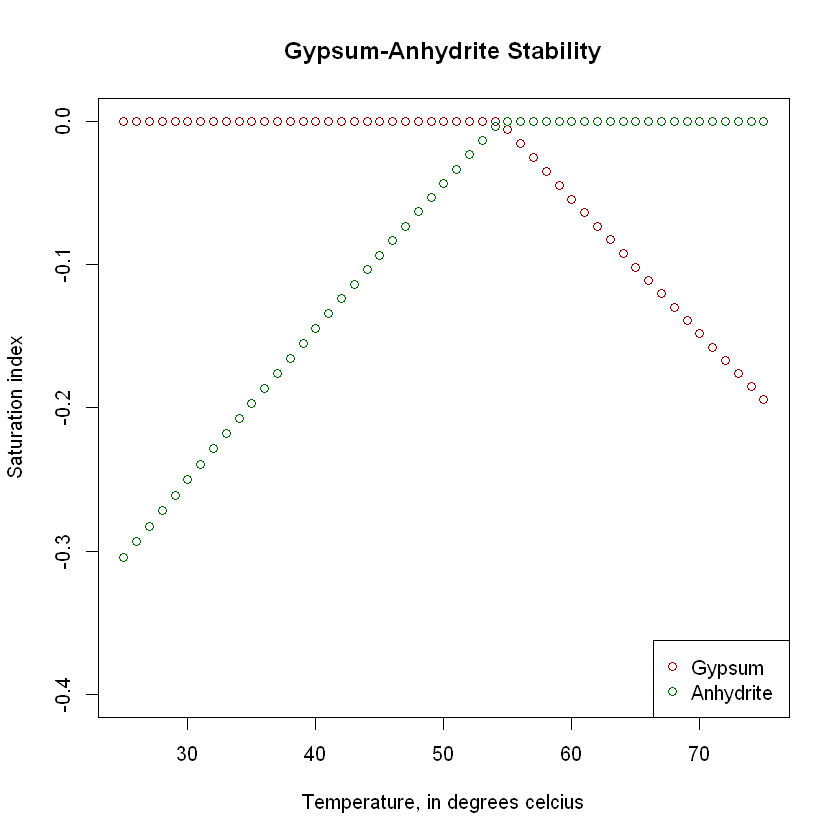

In [19]:
# Graficando los resultados
attach(so$n1) # Se adjunta la base de datos solicitada 
title <- "Gypsum-Anhydrite Stability"
xlabel <- "Temperature, in degrees celcius"
ylabel <- "Saturation index"
plot(temp.C., si_gypsum, main = title, xlab = xlabel, ylab = ylabel,col = "darkred", xlim = c(25, 75), ylim = c(-0.4, 0.0))
points(temp.C., si_anhydrite, col = "darkgreen")
legend("bottomright", c("Gypsum", "Anhydrite"),
col = c("darkred", "darkgreen"), pch = c(1, 1))


In [20]:
# Amm.dat --> The Amm.dat database.
#Amm.dat is the same as phreeqc.dat, except that ammonia redox state has been decoupled from
#the rest of the nitrogen system; that is, ammonia has been defined as a separate component. The
#database has been reformatted for use by phrLoadDatabaseString.
# Uso
# =============================
phrLoadDatabaseString(Amm.dat)


In [21]:
# ColdChem.dat --> The ColdChem.dat database.
# ColdChem.dat is a low-temperature thermodynamic model for 
# the Na-K-Ca-Mg-Cl system incorporating new experimental heat capacities in KCl, MgCl2, and CaCl2 solutions. 
# Jonathan D. Toner and David C. Catling The database has been reformatted for use by phrLoadDatabaseString.
# Uso
# =============================
phrLoadDatabaseString(ColdChem.dat)

In [22]:
# core10.dat --> The core10.dat database
# core10.dat is a database derived from phreeqc.dat and llnl.dat, with careful data checking, use of
# SUPCRT for temperature dependence, and addition of molar volumes for pressure dependence.
# Contributed by Marc Neveu. The database has been reformatted for use by phrLoadDatabaseString.
# Uso
# =============================
phrLoadDatabaseString(core10.dat)


ERROR: Error in phrLoadDatabaseString(core10.dat): objeto 'core10.dat' no encontrado


### EJEMPLO 1. MODELO DE DISTRIBUCIÓN DE ESPECIES ACUOSAS

In [23]:
# ex1
# This example calculates the distribution of aqueous species in seawater and the saturation state of
# seawater relative to a set of minerals. To demonstrate how to expand the model to new elements,
# uranium is added to the aqueous model defined by phreeqc.dat. The example can be run using the
# phrRunString routine.
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex1)
phrGetOutputStrings() 

[1] "------------------------------------"                                            
  [2] "Reading input data for simulation 1."                                            
  [3] "------------------------------------"                                            
  [4] ""                                                                                
  [5] "\tTITLE Example 1.--Add uranium and speciate seawater."                           
  [6] "\tSOLUTION 1  SEAWATER FROM NORDSTROM AND OTHERS (1979)"                          
  [7] "\t        units   ppm"                                                            
  [8] "\t        pH      8.22"                                                           
  [9] "\t        pe      8.451"                                                          
 [10] "\t        density 1.023"                                                          
 [11] "\t        temp    25.0"                                                           
 [12] "\t        redox   O(0)/O(-2)"                                                     
 [13] "\t        Ca              412.3"                                                  
 [14] "\t        Mg              1291.8"                                                 
 [15] "\t        Na              10768.0"                                                
 [16] "\t        K               399.1"                                                  
 [17] "\t        Fe              0.002"                                                  
 [18] "\t        Mn              0.0002  pe"                                             
 [19] "\t        Si              4.28"                                                   
 [20] "\t        Cl              19353.0"                                                
 [21] "\t        Alkalinity      141.682 as HCO3"                                        
 [22] "\t        S(6)            2712.0"                                                 
 [23] "\t        N(5)            0.29    gfw   62.0"                                     
 [24] "\t        N(-3)           0.03    as    NH4"                                      
 [25] "\t        U               3.3     ppb   N(5)/N(-3)"                               
 [26] "\t        O(0)            1.0     O2(g) -0.7"                                     
 [27] "\tSOLUTION_MASTER_SPECIES"                                                        
 [28] "\t        U       U+4     0.0     238.0290     238.0290"                          
 [29] "\t        U(4)    U+4     0.0     238.0290"                                       
 [30] "\t        U(5)    UO2+    0.0     238.0290"                                       
 [31] "\t        U(6)    UO2+2   0.0     238.0290"                                       
 [32] "\tSOLUTION_SPECIES"                                                               
 [33] "\t        U+4 = U+4"                                                              
 [34] "\t                log_k          0.0"                                             
 [35] "\t        U+4 + 4 H2O = U(OH)4 + 4 H+"                                            
 [36] "\t                log_k          -8.538"                                          
 [37] "\t                delta_h        24.760 kcal"                                     
 [38] "\t        U+4 + 5 H2O = U(OH)5- + 5 H+"                                           
 [39] "\t                log_k          -13.147"                                         
 [40] "\t                delta_h        27.580 kcal"                                     
 [41] "\t        U+4 + 2 H2O = UO2+ + 4 H+ + e-"                                         
 [42] "\t                log_k          -6.432"                                          
 [43] "\t                delta_h        31.130 kcal"                                     
 [44] "\t        U+4 + 2 H2O = UO2+2 + 4 H+ + 2 e-"                                      
 [45] "\t                log_k          -9.217

#### CARGA DE BASE DE DATOS

In [55]:
phrLoadDatabaseString(phreeqc.dat)

#### CONFIGURAR SALIDA EN FORMA DE STRING

In [56]:
phrSetOutputStringsOn(TRUE)

#### CORRER EL INPUT DEL EJERCICIO 1

In [57]:
phrRunString(ex1)

In [58]:
phrGetOutputStrings()

[1] "------------------------------------"                                            
  [2] "Reading input data for simulation 1."                                            
  [3] "------------------------------------"                                            
  [4] ""                                                                                
  [5] "\tTITLE Example 1.--Add uranium and speciate seawater."                           
  [6] "\tSOLUTION 1  SEAWATER FROM NORDSTROM AND OTHERS (1979)"                          
  [7] "\t        units   ppm"                                                            
  [8] "\t        pH      8.22"                                                           
  [9] "\t        pe      8.451"                                                          
 [10] "\t        density 1.023"                                                          
 [11] "\t        temp    25.0"                                                           
 [12] "\t        redox   O(0)/O(-2)"                                                     
 [13] "\t        Ca              412.3"                                                  
 [14] "\t        Mg              1291.8"                                                 
 [15] "\t        Na              10768.0"                                                
 [16] "\t        K               399.1"                                                  
 [17] "\t        Fe              0.002"                                                  
 [18] "\t        Mn              0.0002  pe"                                             
 [19] "\t        Si              4.28"                                                   
 [20] "\t        Cl              19353.0"                                                
 [21] "\t        Alkalinity      141.682 as HCO3"                                        
 [22] "\t        S(6)            2712.0"                                                 
 [23] "\t        N(5)            0.29    gfw   62.0"                                     
 [24] "\t        N(-3)           0.03    as    NH4"                                      
 [25] "\t        U               3.3     ppb   N(5)/N(-3)"                               
 [26] "\t        O(0)            1.0     O2(g) -0.7"                                     
 [27] "\tSOLUTION_MASTER_SPECIES"                                                        
 [28] "\t        U       U+4     0.0     238.0290     238.0290"                          
 [29] "\t        U(4)    U+4     0.0     238.0290"                                       
 [30] "\t        U(5)    UO2+    0.0     238.0290"                                       
 [31] "\t        U(6)    UO2+2   0.0     238.0290"                                       
 [32] "\tSOLUTION_SPECIES"                                                               
 [33] "\t        U+4 = U+4"                                                              
 [34] "\t                log_k          0.0"                                             
 [35] "\t        U+4 + 4 H2O = U(OH)4 + 4 H+"                                            
 [36] "\t                log_k          -8.538"                                          
 [37] "\t                delta_h        24.760 kcal"                                     
 [38] "\t        U+4 + 5 H2O = U(OH)5- + 5 H+"                                           
 [39] "\t                log_k          -13.147"                                         
 [40] "\t                delta_h        27.580 kcal"                                     
 [41] "\t        U+4 + 2 H2O = UO2+ + 4 H+ + e-"                                         
 [42] "\t                log_k          -6.432"                                          
 [43] "\t                delta_h        31.130 kcal"                                     
 [44] "\t        U+4 + 2 H2O = UO2+2 + 4 H+ + 2 e-"                                      
 [45] "\t                log_k          -9.217

In [59]:
so <- phrGetSelectedOutput()

head(so)

NULL

## EJEMPLO 10. MODELO DE DISTRIBUCIÓN DE ESPECIES ACUOSAS

####  PHREEQC tiene la capacidad de modelar soluciones binarias no ideales y de multi composición ideales. 
####  Para soluciones sólidas ideales, la actividad de cada miembro del extremo sólido es igual a su fracción molar.
####  Para soluciones sólidas no ideales, la actividad de cada miembro final  es el producto de la fracción molar y un coeficiente de #### actividad,  que se determina a partir de la fracción molar y los parámetros de exceso de energía libre de Guggenheim.


#### El ejemplo 10 considera una solución sólida de aragonita (CaCO3) y estroncianita (SrCO3) y demuestra como la composición de #### la solución sólida y la fase acuosa cambian a medida que se agrega carbonato de estroncio a un sistema de carbonato de calcio #### inicialmente puro.

In [60]:
# Se carga la base de datos conveniente.
phrLoadDatabaseString(phreeqc.dat)

# Configurando el archivo de salida como un string
phrSetOutputStringsOn(TRUE)

# Corriendo el ejemplo 10
phrRunString(ex10)

# Guardando el archivo de salida como un data frame
so <- phrGetSelectedOutput()

head(so$n1)

reaction lg_SigmaPi X_Arag    X_Stront     X_Ca_aq   X_Sr_aq      mol_Misc1
1 1e-05    -8.335613  0.9999578 4.217363e-05 0.9990492 0.0009508049 1e-10    
2 2e-05    -8.335227  0.9999155 8.445700e-05 0.9980991 0.0019009322 1e-10    
3 3e-05    -8.334840  0.9998731 1.268506e-04 0.9971496 0.0028503819 1e-10    
4 4e-05    -8.334453  0.9998306 1.693548e-04 0.9962008 0.0037991543 1e-10    
5 5e-05    -8.334066  0.9997880 2.119702e-04 0.9952528 0.0047472492 1e-10    
6 6e-05    -8.333679  0.9997453 2.546972e-04 0.9943053 0.0056946668 1e-10    
  mol_Misc2 mol_Arag     mol_Stront  
1 1e-10     6.543581e-06 2.759782e-10
2 1e-10     1.308505e-05 1.105217e-09
3 1e-10     1.962440e-05 2.489682e-09
4 1e-10     2.616163e-05 4.431349e-09
5 1e-10     3.269674e-05 6.932205e-09
6 1e-10     3.922974e-05 9.994250e-09

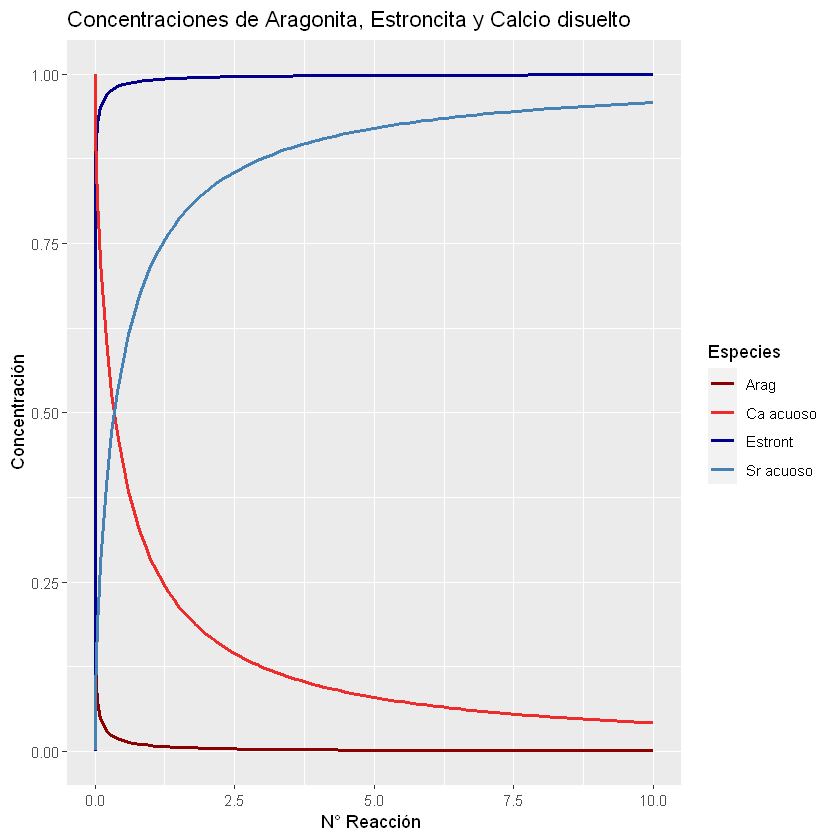

In [61]:

ggplot(so$n1) + 
       geom_line(mapping=aes(y=X_Arag,x= reaction,color="Arag"),size=1 ) + 
       geom_line(mapping=aes(y=X_Stront,x= reaction,color="Estront"),size=1 ) + 
       geom_line(mapping=aes(y=X_Ca_aq,x= reaction,color="Ca acuoso"),size=1 ) +
       geom_line(mapping=aes(y=X_Sr_aq,x= reaction,color="Sr acuoso"),size=1 ) +
       ggtitle("Concentraciones de Aragonita, Estroncita y Calcio disuelto") +
       xlab("N° Reacción ") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Arag' = 'darkred',
          'Estront' = 'darkblue',
          "Ca acuoso"="firebrick2",
          "Sr acuoso"="steelblue")) +
      labs(color = 'Especies')


## EJEMPLO 11. Transporte e intercambio catiónico


#### El siguiente ejemplo simula la composición química del efluente de una columna que contiene un intercambiador catiónico.
#### Inicialmente, la columna contiene una solución de nitrato de sodio-potasio en equilibrio con el intercambiador. La columna se #### lava con tres volúmenes de los poros de solución de CaCl2.

#### El calcio, el potasio y el sodio reaccionan al equilibrio con el intercambiador en todo momento. El problema se ejecuta de dos maneras: usando el bloque de datos ADVECTION, que modela solo la advección, y usando el bloque de datos TRANSPORT, que simula la advección y la mezcla dispersiva.


In [69]:
# Configurando base de datos
phrLoadDatabaseString(phreeqc.dat)

# Configurando el archivo de salida como un string
phrSetOutputStringsOn(TRUE)

# Corriendo el ejemplo 11
phrRunString(ex11)

# Guardando el archivo de salida como un data frame
so <- phrGetSelectedOutput()

head(so$n1)


step Na.mol.kgw. Cl.mol.kgw. K.mol.kgw. Ca.mol.kgw. Pore_vol
1 1    0.001       0           2e-04      0           0.0375  
2 2    0.001       0           2e-04      0           0.0625  
3 3    0.001       0           2e-04      0           0.0875  
4 4    0.001       0           2e-04      0           0.1125  
5 5    0.001       0           2e-04      0           0.1375  
6 6    0.001       0           2e-04      0           0.1625

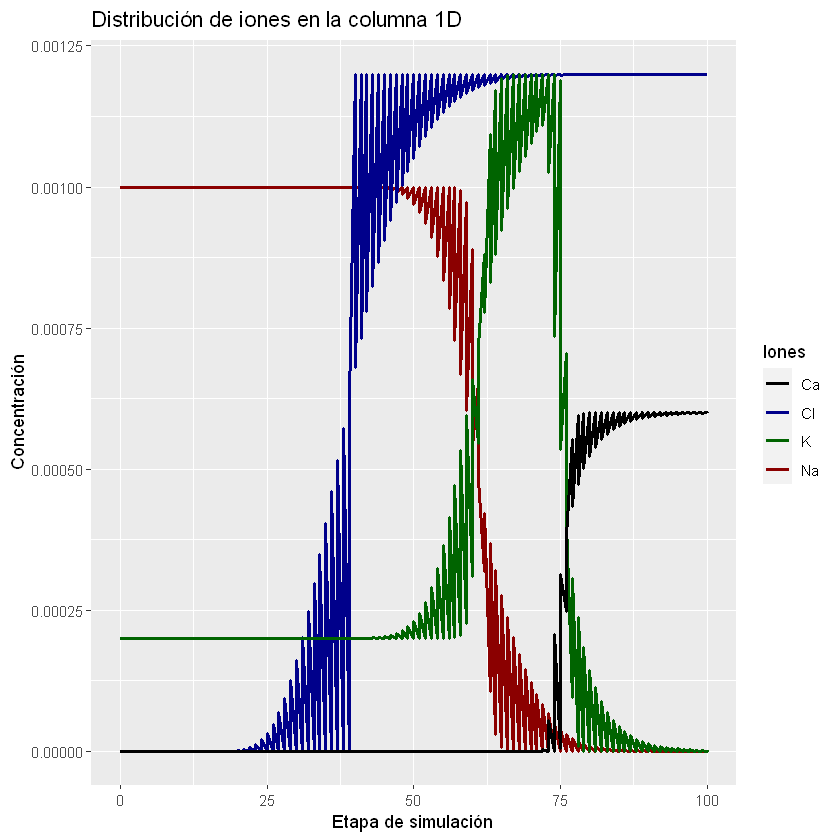

In [70]:
ggplot(so$n1) + 
       geom_line(mapping=aes(y=Na.mol.kgw.,x= step,color="Na"),size=1 ) + 
       geom_line(mapping=aes(y=	Cl.mol.kgw.,x= step,color="Cl"),size=1 ) + 
       geom_line(mapping=aes(y=K.mol.kgw.,x= step,color="K"),size=1 ) +
       geom_line(mapping=aes(y=Ca.mol.kgw.,x= step,color="Ca"),size=1 ) +
       ggtitle("Distribución de iones en la columna 1D") +
       xlab("Etapa de simulación") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Na' = 'darkred',
          'Cl' = 'darkblue',
          "K"="darkgreen",
          "Ca"="black")) +
      labs(color = 'Iones')


## EJEMPLO 12. Flujo advectivo y difusivo de calor y solutos en la columna 1D

#### Este ejemplo demuestra la capacidad de PHREEQC para calcular el transporte transitorio de calor y solutos 
#### en una columna o a lo largo de una línea de flujo 1D.

#### La columna es inicialmente llenada con una solución diluida de KCl a 25° y entra en equilibrio con el 
#### intercambiador catiónico. Luego, una solución de KNO3 entra en la columna y establece una nueva temperatura
#### a 0°C. Subsecuentemente, una solución de NCl a 24°C difunde desde ambos extremos de la columna, asumiendo que
#### no hay pérdida calorífica por las paredes.

#### En un extremo, se impone una condición límite constante, y en el otro extremo, la celda final se llena con 
#### la solución de cloruro de sodio y se prescribe una condición límite cerrada.

#### Para el final de la columna con una condición límite constante, se compara una solución analítica con los 
#### resultados de PHREEQC, para Cl- sin retardo (R = 1.0) y Na + y temperatura retardados (R = 3.0). 
#### Finalmente, la precisión de segundo orden del método numérico se verifica aumentando el número de celdas 
#### en un factor de tres y demostrando una disminución en el error de la solución numérica en aproximadamente 
#### un orden de magnitud en relación con la solución analítica.

In [79]:
# Configurando base de datos
phrLoadDatabaseString(phreeqc.dat)

# Configurando el archivo de salida como un string
phrSetOutputStringsOn(TRUE)

# Corriendo el ejemplo 12
phrRunString(ex12)

# Guardando el archivo de salida como un data frame
so <- phrGetSelectedOutput()

head(so$n1)


dist_x    temp.C. Na_mmol K_mmol Cl_mmol
1        NA 24      24       0     24     
2        NA 24      24       0     24     
3        NA 24      24       0     24     
4 0.0000000 24      24       0     24     
5 0.1666665  0       0      24      0     
6 0.4999995  0       0      24      0

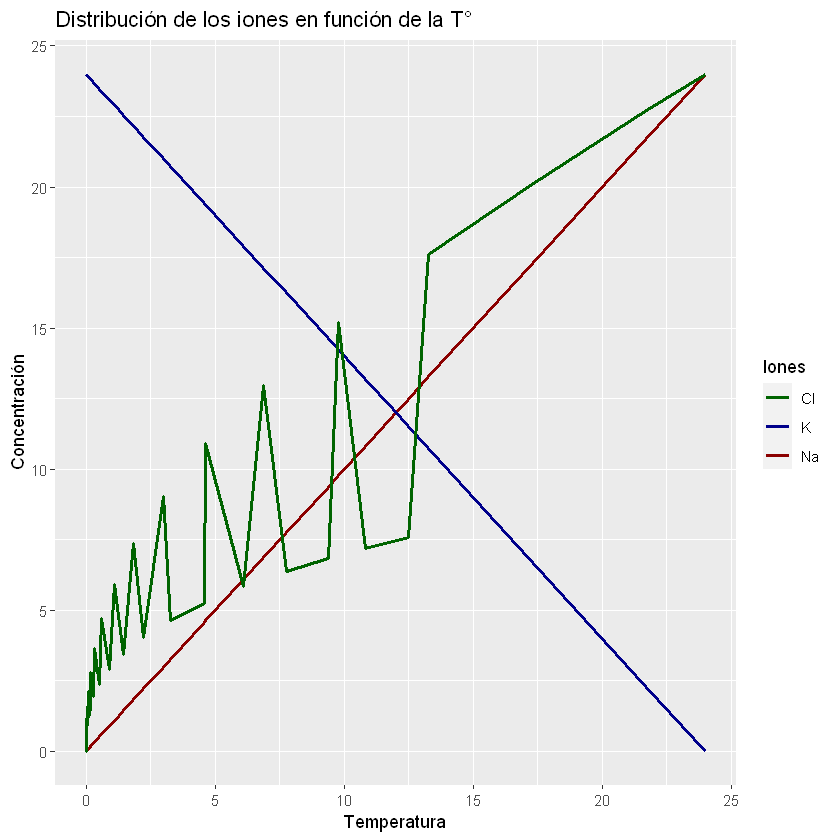

In [72]:
ggplot(so$n1) + 
       geom_line(mapping=aes(y=Na_mmol,x= temp.C.,color="Na"),size=1 ) + 
       geom_line(mapping=aes(y=K_mmol,x= temp.C.,color="K"),size=1 ) + 
       geom_line(mapping=aes(y=Cl_mmol,x= temp.C.,color="Cl"),size=1 ) +
       ggtitle("Distribución de los iones en función de la T°") +
       xlab("Temperatura") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Na' = 'darkred',
          'K' = 'darkblue',
          "Cl"="darkgreen")) +
      labs(color = 'Iones')



Warning message:
"Removed 3 row(s) containing missing values (geom_path)."
Warning message:
"Removed 3 row(s) containing missing values (geom_path)."
Warning message:
"Removed 3 row(s) containing missing values (geom_path)."


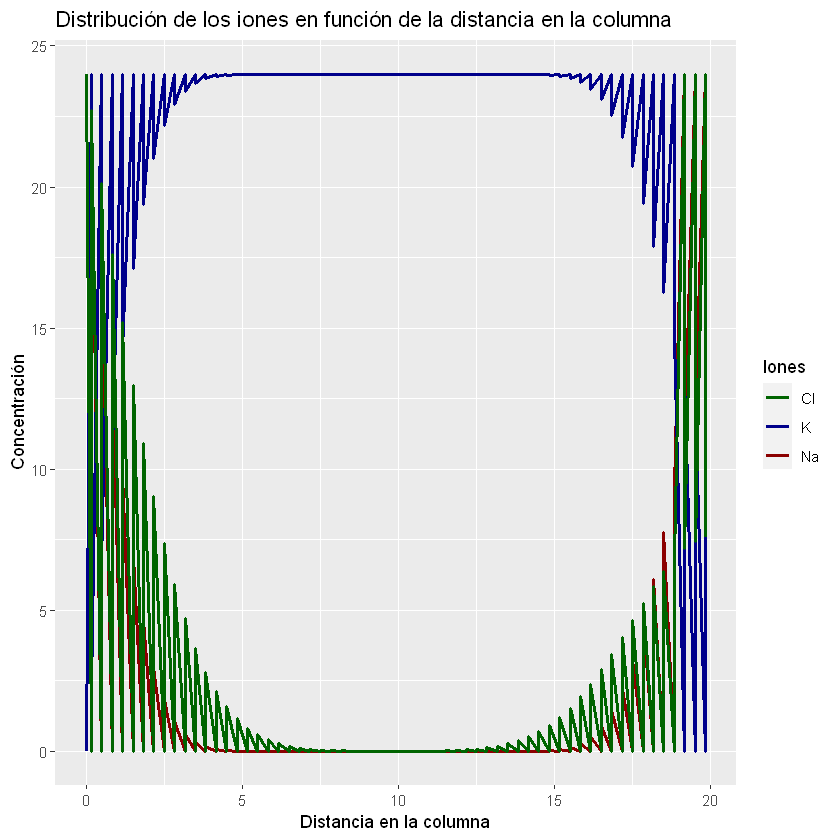

In [80]:
ggplot(so$n1) + 
       geom_line(mapping=aes(y=Na_mmol,x= dist_x,color="Na"),size=1 ) + 
       geom_line(mapping=aes(y=K_mmol,x= dist_x,color="K"),size=1 ) + 
       geom_line(mapping=aes(y=Cl_mmol,x= dist_x,color="Cl"),size=1 ) +
       ggtitle("Distribución de los iones en función de la distancia en la columna") +
       xlab("Distancia en la columna") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Na' = 'darkred',
          'K' = 'darkblue',
          "Cl"="darkgreen")) +
      labs(color = 'Iones')


In [146]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex14)
phrGetOutputStrings()

[1] "------------------------------------"                                                                        
   [2] "Reading input data for simulation 1."                                                                        
   [3] "------------------------------------"                                                                        
   [4] ""                                                                                                            
   [5] "\tTITLE Example 14.--Transport with equilibrium_phases, exchange, and surface reactions"                      
   [6] "\tSURFACE_MASTER_SPECIES"                                                                                     
   [7] "\t        Surf    SurfOH"                                                                                     
   [8] "\tSURFACE_SPECIES"                                                                                            
   [9] "\t        SurfOH = SurfOH"                                                                                    
  [10] "\t                log_k   0.0"                                                                                
  [11] "\t        SurfOH  + H+ = SurfOH2+"                                                                            
  [12] "\t                log_k   7.29"                                                                               
  [13] "\t        SurfOH = SurfO- + H+"                                                                               
  [14] "\t                log_k   -8.93"                                                                              
  [15] "\t        SurfOH + AsO4-3 + 3H+ = SurfH2AsO4 + H2O"                                                           
  [16] "\t                log_k   29.31"                                                                              
  [17] "\t        SurfOH + AsO4-3 + 2H+ = SurfHAsO4- + H2O"                                                           
  [18] "\t                log_k   23.51"                                                                              
  [19] "\t        SurfOH + AsO4-3 = SurfOHAsO4-3"                                                                     
  [20] "\t                log_k   10.58"                                                                              
  [21] "\tSOLUTION_MASTER_SPECIES"                                                                                    
  [22] "\t        As       H3AsO4        -1.0     74.9216    74.9216"                                                 
  [23] "\tSOLUTION_SPECIES"                                                                                           
  [24] "\t        H3AsO4 = H3AsO4"                                                                                    
  [25] "\t                log_k           0.0"                                                                        
  [26] "\t        H3AsO4 = AsO4-3 + 3H+"                                                                              
  [27] "\t                log_k   -20.7"                                                                              
  [28] "\t        H+ + AsO4-3 = HAsO4-2"                                                                              
  [29] "\t                log_k   11.50"                                                                              
  [30] "\t        2H+ + AsO4-3 = H2AsO4-"                                                                             
  [31] "\t                log_k           18.46"                                                                      
  [32] "\tSOLUTION 1 Brine"                                                                                           
  [33] "\t        pH      5.713"                                                                                      
  [34] "\t        pe      4.0     O2(g)   -0.7"                                 

In [82]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex14)
so <- phrGetSelectedOutput()

head(so$n1)

step m_Ca         m_Mg         m_Na       umol_As    pH       mmol_sorbedAs
1 1    4.644499e-01 1.619942e-01 5.40200410 0.02500002 5.885162 0.000000     
2 1    3.432984e-04 2.439645e-04 0.09332216 0.00153738 7.224442 2.521999     
3 2    2.837756e-05 1.902852e-05 0.02343808 0.18099038 8.663843 2.521818     
4 3    1.512463e-05 9.386940e-06 0.01467086 1.18743999 9.165242 2.520631     
5 4    1.320327e-05 7.986282e-06 0.01263644 1.99950892 9.306742 2.518632     
6 5    1.279619e-05 7.690903e-06 0.01184333 2.32543375 9.347539 2.516306

In [110]:
#data<-so$n1[-c(1),] #Se quita la primer lína
head(data)

step m_Ca         m_Mg         m_Na       umol_As    pH       mmol_sorbedAs
2 1    3.432984e-04 2.439645e-04 0.09332216 0.00153738 7.224442 2.521999     
3 2    2.837756e-05 1.902852e-05 0.02343808 0.18099038 8.663843 2.521818     
4 3    1.512463e-05 9.386940e-06 0.01467086 1.18743999 9.165242 2.520631     
5 4    1.320327e-05 7.986282e-06 0.01263644 1.99950892 9.306742 2.518632     
6 5    1.279619e-05 7.690903e-06 0.01184333 2.32543375 9.347539 2.516306     
7 6    1.283153e-05 7.718728e-06 0.01144253 2.36859094 9.351728 2.513938

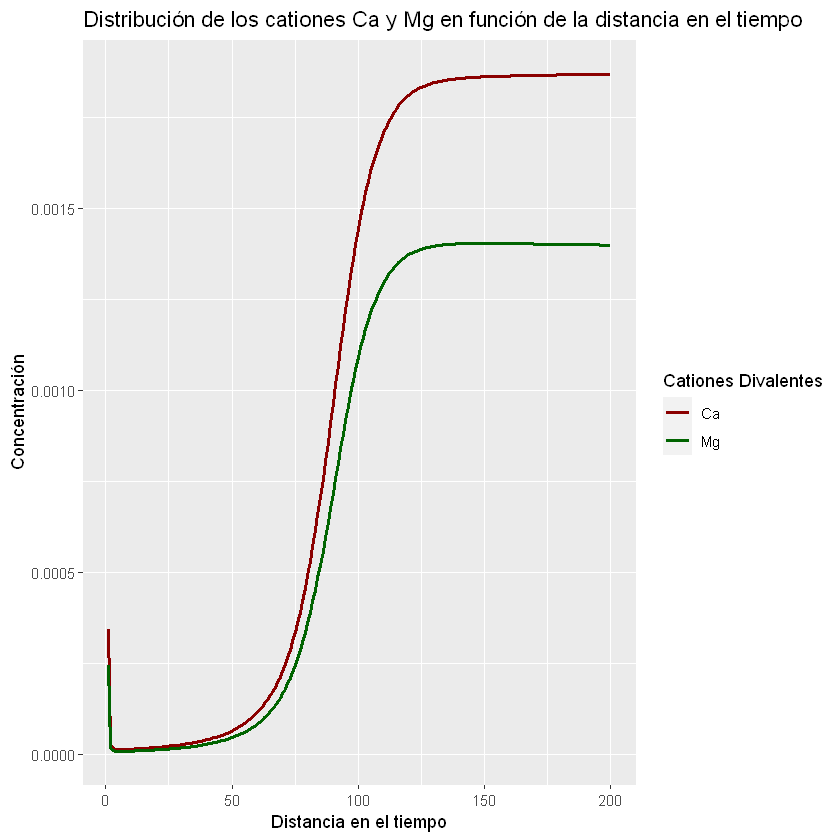

In [109]:
ggplot(data) + 
       geom_line(mapping=aes(y=m_Ca,x= step,color="Ca"),size=1 ) + 
       geom_line(mapping=aes(y=m_Mg,x= step,color="Mg"),size=1 ) + 
#       geom_line(mapping=aes(y=m_Na,x= step,color="Na"),size=1 ) +
#       geom_line(mapping=aes(y=umol_As,x= step,color="As"),size=1 ) +
       ggtitle("Distribución de los cationes Ca y Mg en función de la distancia en el tiempo") +
       xlab("Distancia en el tiempo") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Ca' = 'darkred',
          'Mg' = 'darkgreen'
#          'Na' = 'darkblue'
#          "As"="black"
      )) +
      labs(color = 'Cationes Divalentes')

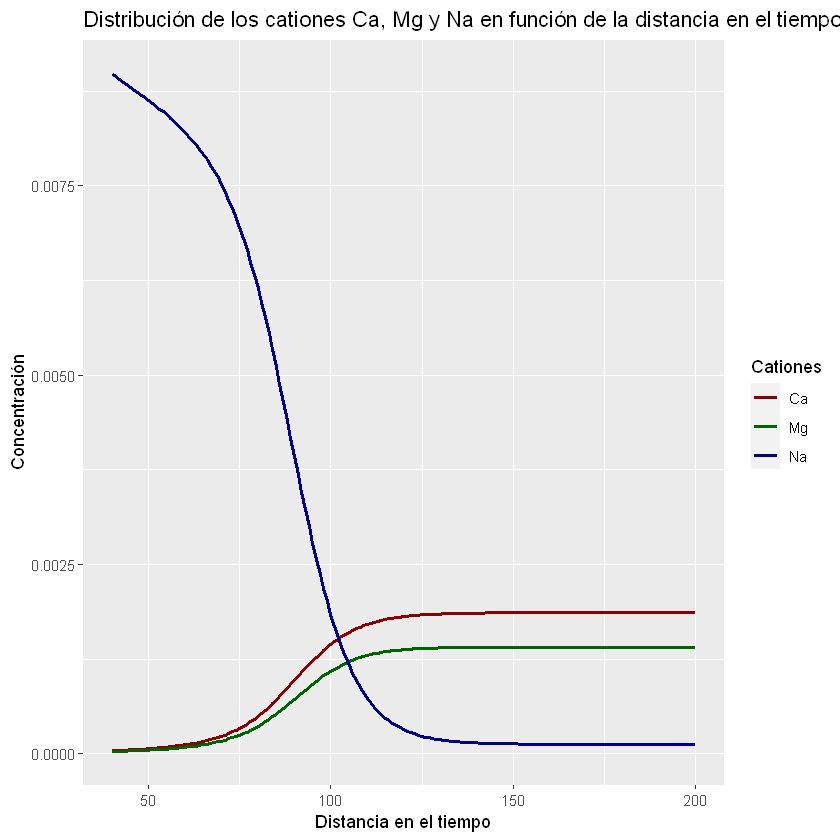

In [106]:
ggplot(data[c(40:200),]) + 
       geom_line(mapping=aes(y=m_Ca,x= step,color="Ca"),size=1 ) + 
       geom_line(mapping=aes(y=m_Mg,x= step,color="Mg"),size=1 ) + 
       geom_line(mapping=aes(y=m_Na,x= step,color="Na"),size=1 ) +
#       geom_line(mapping=aes(y=umol_As,x= step,color="As"),size=1 ) +
       ggtitle("Distribución de los cationes Ca, Mg y Na en función de la distancia en el tiempo") +
       xlab("Distancia en el tiempo") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Ca' = 'darkred',
          'Mg' = 'darkgreen',
          'Na' = 'darkblue'
#          "As"="black"
      )) +
      labs(color = 'Cationes')

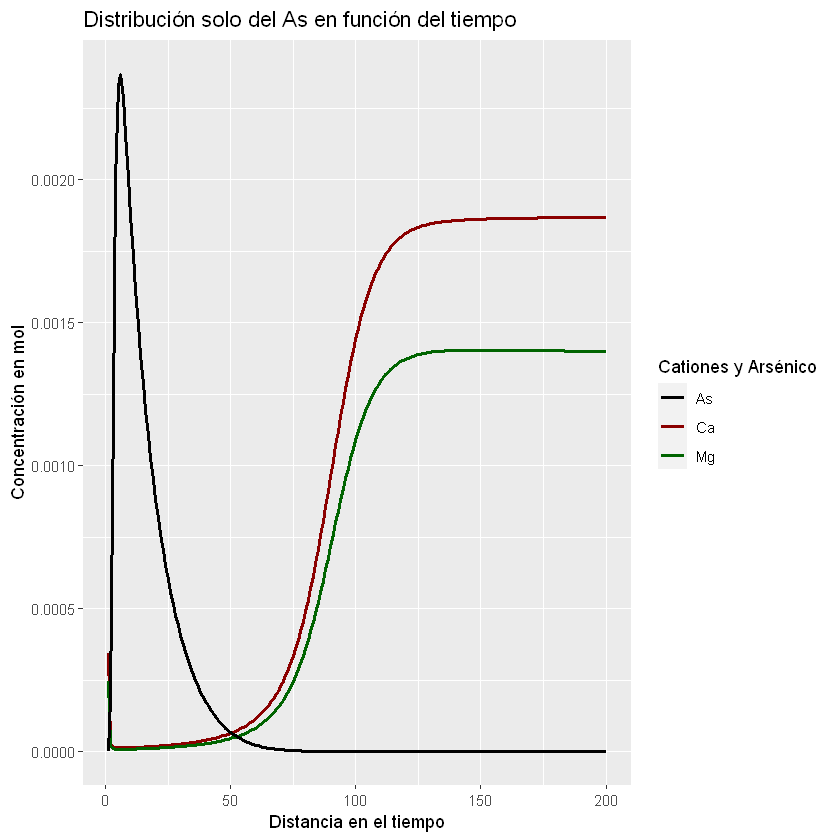

In [118]:
ggplot(data[c(1:200),]) + 
       geom_line(mapping=aes(y=m_Ca,x= step,color="Ca"),size=1 ) + 
       geom_line(mapping=aes(y=m_Mg,x= step,color="Mg"),size=1 ) + 
#       geom_line(mapping=aes(y=m_Na,x= step,color="Na"),size=1 ) +
       geom_line(mapping=aes(y=umol_As*(10**-3),x= step,color="As"),size=1 ) +
       ggtitle("Distribución solo del As en función del tiempo") +
       xlab("Distancia en el tiempo") +
       ylab("Concentración en mol") +
      scale_color_manual(values = c(
          'Ca' = 'darkred',
          'Mg' = 'darkgreen',
#          'Na' = 'darkblue',
          "As"="black" # Las dimensiones del pico arsénico son referenciales
      )) +
      labs(color = 'Cationes y Arsénico')

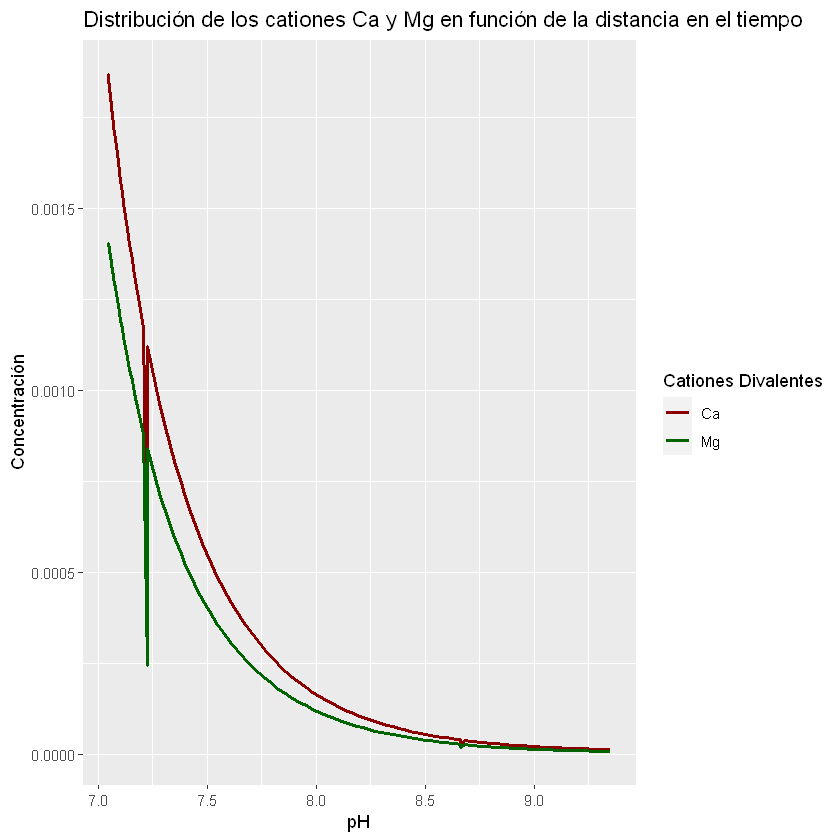

In [112]:
ggplot(data) + 
       geom_line(mapping=aes(y=m_Ca,x= pH,color="Ca"),size=1 ) + 
       geom_line(mapping=aes(y=m_Mg,x= pH,color="Mg"),size=1 ) + 
#       geom_line(mapping=aes(y=m_Na,x= step,color="Na"),size=1 ) +
#       geom_line(mapping=aes(y=umol_As,x= step,color="As"),size=1 ) +
       ggtitle("Distribución de los cationes Ca y Mg en función del pH del medio") +
       xlab("pH") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Ca' = 'darkred',
          'Mg' = 'darkgreen'
#          'Na' = 'darkblue'
#          "As"="black"
      )) +
      labs(color = 'Cationes Divalentes')

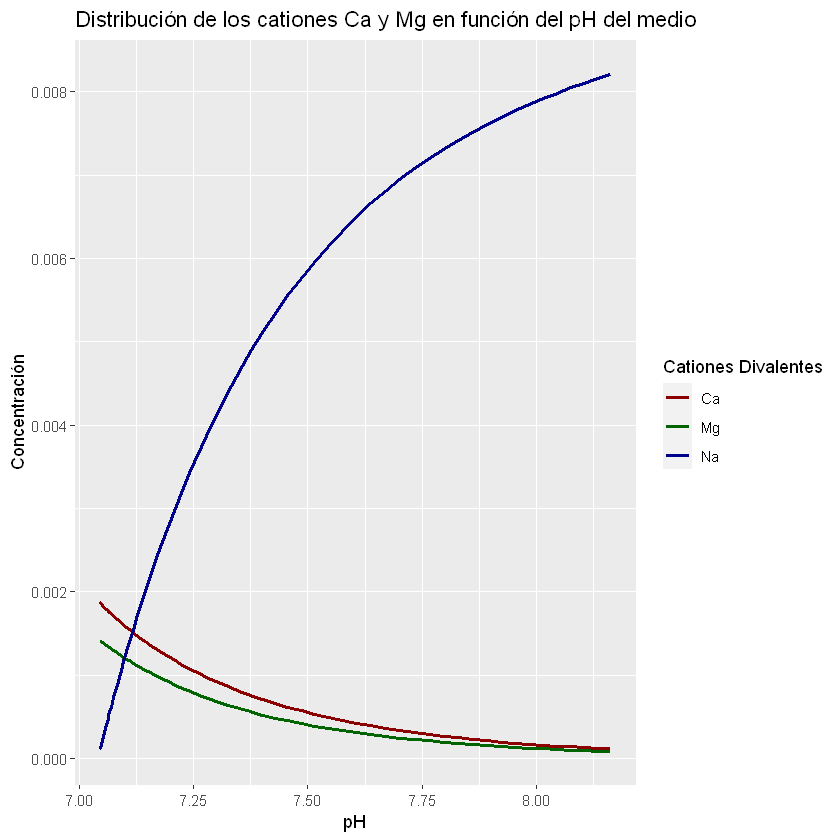

In [114]:
ggplot(data[c(60:200),]) + 
       geom_line(mapping=aes(y=m_Ca,x= pH,color="Ca"),size=1 ) + 
       geom_line(mapping=aes(y=m_Mg,x= pH,color="Mg"),size=1 ) + 
       geom_line(mapping=aes(y=m_Na,x= pH,color="Na"),size=1 ) +
#       geom_line(mapping=aes(y=umol_As,x= step,color="As"),size=1 ) +
       ggtitle("Distribución de los cationes Ca y Mg en función del pH del medio") +
       xlab("pH") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Ca' = 'darkred',
          'Mg' = 'darkgreen',
          'Na' = 'darkblue'
#          "As"="black"
      )) +
      labs(color = 'Cationes Divalentes')

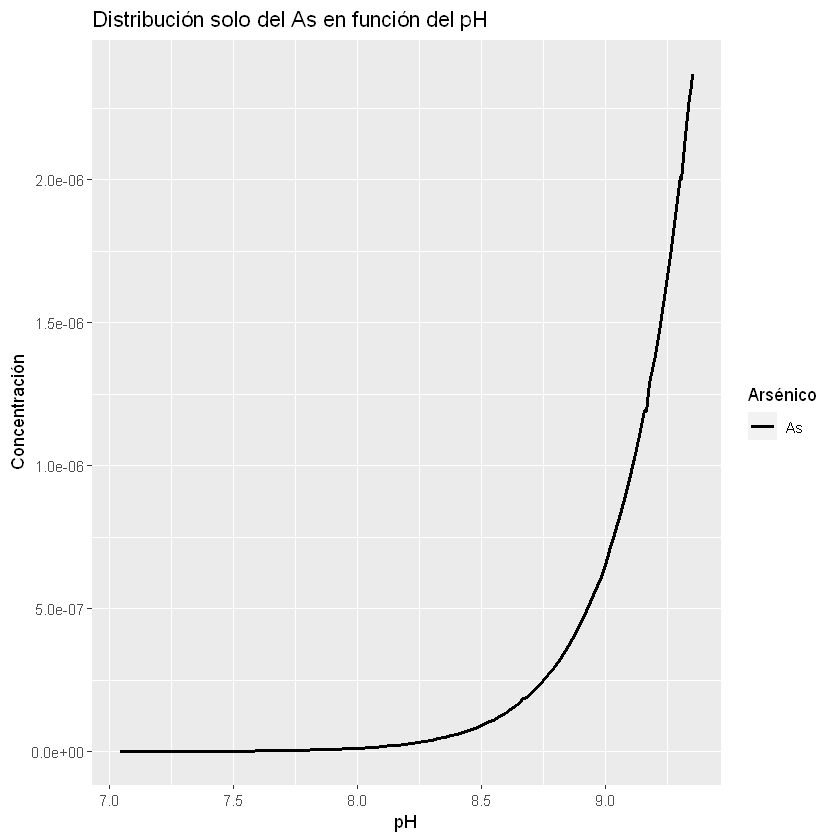

In [116]:
ggplot(data[c(1:200),]) + 
#       geom_line(mapping=aes(y=m_Ca,x= step,color="Ca"),size=1 ) + 
#       geom_line(mapping=aes(y=m_Mg,x= step,color="Mg"),size=1 ) + 
#       geom_line(mapping=aes(y=m_Na,x= step,color="Na"),size=1 ) +
       geom_line(mapping=aes(y=umol_As*(10**-6),x= pH,color="As"),size=1 ) +
       ggtitle("Distribución solo del As en función del pH") +
       xlab("pH") +
       ylab("Concentración") +
      scale_color_manual(values = c(
#          'Ca' = 'darkred',
#          'Mg' = 'darkgreen',
#          'Na' = 'darkblue',
          "As"="black"
      )) +
      labs(color = 'Arsénico')

## EJEMPLO 15. Transporte: biodegradación cinética, crecimiento celular y sorción.

#### Tebes-Stevens y Valocchi (1997) y Tebes-Stevens y otros (1998) desarrollaron un problema de 

#### prueba para el transporte reactivo advectivo y dispersivo.  Aunque se basa en una química de 

#### especiación relativamente simple, la solución al problema demuestra varios procesos químicos 

#### interactivos que son comunes a muchos problemas ambientales:

#### - Degradación mediada por bacterias de un sustrato orgánico

#### - Crecimiento y descomposición de células bacterianas

#### - Sorción de metal.

#### - Especiación acuosa.

#### - Acomplejación multi-ligante.

#### En este ejemplo, el problema de la prueba se resuelve con PHREEQC, que produce resultados 

#### casi idénticos a los de Tebes-Stevens y Valocchi (1997) y Tebes-Stevens y otros (1998)

In [138]:
# Configurando base de datos
phrLoadDatabaseString(ex15.dat)

# Configurando el archivo de salida como un string
phrSetOutputStringsOn(TRUE)

# Guardando el archivo de salida como un data frame
phrGetOutputStrings()


[1] "------------------------------------"                                            
 [2] "Reading input data for simulation 1."                                            
 [3] "------------------------------------"                                            
 [4] ""                                                                                
 [5] "\tSOLUTION 0"                                                                     
 [6] "\t DELETE"                                                                        
 [7] "\t -solution 0"                                                                   
 [8] "-------------------------------------------"                                     
 [9] "Beginning of initial solution calculations."                                     
[10] "-------------------------------------------"                                     
[11] ""                                                                                
[12] "Initial solution 0.\t"                                                            
[13] ""                                                                                
[14] "-----------------------------Solution composition------------------------------" 
[15] ""                                                                                
[16] "\tElements           Molality       Moles"                                        
[17] ""                                                                                
[18] "\tPure water     "                                                                
[19] ""                                                                                
[20] "----------------------------Description of solution----------------------------" 
[21] ""                                                                                
[22] "                                       pH  =   7.000    "                        
[23] "                                       pe  =   4.000    "                        
[24] "                        Activity of water  =   1.000"                            
[25] "                 Ionic strength (mol/kgw)  =  1.000e-007"                        
[26] "                       Mass of water (kg)  =  1.000e+000"                        
[27] "                 Total alkalinity (eq/kg)  =  0.000e+000"                        
[28] "                         Temperature (oC)  =  25.00"                             
[29] "                  Electrical balance (eq)  =  0.000e+000"                        
[30] " Percent error, 100*(Cat-|An|)/(Cat+|An|)  =   0.00"                             
[31] "                               Iterations  =   0"                                
[32] "                                  Total H  = 1.110124e+002"                      
[33] "                                  Total O  = 5.550622e+001"                      
[34] ""                                                                                
[35] "----------------------------Distribution of species----------------------------" 
[36] ""                                                                                
[37] "                                               Log       Log       Log    mole V"
[38] "   Species          Molality    Activity  Molality  Activity     Gamma   cm3/mol"
[39] ""                                                                                
[40] "   H+             1.000e-007  1.000e-007    -7.000    -7.000    -0.000      0.00"
[41] "   OH-            1.000e-007  1.000e-007    -7.000    -7.000    -0.000     (0)  "
[42] "   H2O            5.551e+001  1.000e+000     1.744     0.000     0.000     18.07"
[43] "H(0)         1.416e-025"                                                         
[44] "   H2             7.079e-026  7.079e-026   -25.150   -25.150     0.000     (0)  "
[45] "O(0)         0.000e+000"                                                         
[46] "   O2             0.000e+000 

## Ejemplo 16 Modelado inverso de las aguas de Sierra Spring

#### Este ejemplo repite los cálculos de modelado inverso de la evolución química de las composiciones de agua de manantial en 

#### Sierra Nevada que se describen en un artículo clásico de Garrels y Mackenzie (1967). Este ejemplo repite los cálculos de 

#### modelado inverso de la evolución química de las composiciones de agua de manantial en Sierra Nevada que se describen en un 

#### artículo clásico de Garrels y Mackenzie (1967). Se supone que las diferencias en la composición entre la primavera efímera y la 

#### primavera perenne son causadas por reacciones entre el agua y los minerales y gases con los que entra en contacto.

#### El objetivoo del modelado inverso, en este ejemplo, es encontrar conjuntos de minerales y gases que, cuando reaccionan en 

#### cantidades apropiadas, explican las diferencias de composición entre las dos soluciones.

In [143]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex16)
phrGetOutputStrings()



[1] "------------------------------------"                                                                                
  [2] "Reading input data for simulation 1."                                                                                
  [3] "------------------------------------"                                                                                
  [4] ""                                                                                                                    
  [5] "\tTITLE Example 16.--Inverse modeling of Sierra springs"                                                              
  [6] "\tSOLUTION_SPREAD"                                                                                                    
  [7] "\t        units mmol/L"                                                                                               
  [8] "\tNumber\tpH\tSi\tCa\tMg\tNa\tK\tAlkalinity\tS(6)\tCl"                                                                         
  [9] "\t1\t6.2\t0.273\t0.078\t0.029\t0.134\t0.028\t0.328      \t0.01\t0.014"                                                         
 [10] "\t2\t6.8\t0.41\t0.26\t0.071\t0.259\t0.04\t0.895    \t0.025\t0.03"                                                              
 [11] "\tINVERSE_MODELING 1"                                                                                                 
 [12] "\t        solutions 1 2"                                                                                              
 [13] "\t        uncertainty 0.025"                                                                                          
 [14] "\t        range"                                                                                                      
 [15] "\t        phases"                                                                                                     
 [16] "\t                Halite"                                                                                             
 [17] "\t                Gypsum"                                                                                             
 [18] "\t                Kaolinite               precip"                                                                     
 [19] "\t                Ca-montmorillonite      precip"                                                                     
 [20] "\t                CO2(g)"                                                                                             
 [21] "\t                Calcite"                                                                                            
 [22] "\t                Chalcedony              precip"                                                                     
 [23] "\t                Biotite                 dissolve"                                                                   
 [24] "\t                Plagioclase             dissolve"                                                                   
 [25] "\t        balances"                                                                                                   
 [26] "\t                Ca      0.05     0.025"                                                                             
 [27] "\tPHASES"                                                                                                             
 [28] "\tBiotite"                                                                                                            
 [29] "\t        KMg3AlSi3O10(OH)2 + 6H+ + 4H2O = K+ + 3Mg+2 + Al(OH)4- + 3H4SiO4 "                                          
 [30] "\t        log_k  0.0      # No log_k, Inverse modeling only"                                                          
 [31] "\tPlagioclase"                                                                                                        
 [32] "\t        Na0.62Ca0.38Al1.38Si2.62O8 + 5.52 H+ + 2.48H2O =        

## Ejemplo 17 Modelado inverso con evaporación

#### La evaporación se maneja de la misma manera que otras reacciones heterogéneas para el modelado inverso.

#### Para modelar la evaporación (o dilución), es necesario incluir una fase con la composición "H2O".

#### El concepto importante en el modelado de la evaporación es la ecuación del balance molecular del agua 

#### (ver Parkhurst y Appelo, 1999, "Ecuaciones y método numérico para el modelado inverso").

#### Los moles de agua en las soluciones iniciales multiplicadas por sus fracciones de mezcla, más el agua 

#### obtenida o perdida por disolución o precipitación de fases, más el agua obtenida o perdida a través de 

#### reacciones redox, deben ser iguales a los moles de agua en la solución final.

#### La ecuación todavía es aproximada porque no incluye los moles de agua obtenida o perdida en las 

#### reacciones de hidrólisis y complejación en las soluciones.

#### Los resultados del modelado inverso se comparan con un modelo directo que usa ecuaciones de Pitzer para calcular la 

#### secuencia de sales que precipitan durante la evaporación.

In [152]:
phrLoadDatabaseString(pitzer.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex17)
phrGetOutputStrings()

[1] "------------------------------------"                                            
  [2] "Reading input data for simulation 1."                                            
  [3] "------------------------------------"                                            
  [4] ""                                                                                
  [5] "\tTITLE Example 17.--Inverse modeling of Black Sea water evaporation"             
  [6] "\tSOLUTION 1  Black Sea water"                                                    
  [7] "\t        units   mg/L"                                                           
  [8] "\t        density 1.014"                                                          
  [9] "\t        pH      8.0     # estimated"                                            
 [10] "\t        Ca      233"                                                            
 [11] "\t        Mg      679"                                                            
 [12] "\t        Na      5820"                                                           
 [13] "\t        K       193"                                                            
 [14] "\t        S(6)    1460"                                                           
 [15] "\t        Cl      10340"                                                          
 [16] "\t        Br      35"                                                             
 [17] "\t        C       1       CO2(g) -3.5"                                            
 [18] "\tSOLUTION 2  Composition during halite precipitation"                            
 [19] "\t        units   mg/L"                                                           
 [20] "\t        density 1.271"                                                          
 [21] "\t        pH      5.0     # estimated"                                            
 [22] "\t        Ca      0.0 "                                                           
 [23] "\t        Mg      50500"                                                          
 [24] "\t        Na      55200"                                                          
 [25] "\t        K       15800"                                                          
 [26] "\t        S(6)    76200"                                                          
 [27] "\t        Cl      187900"                                                         
 [28] "\t        Br      2670"                                                           
 [29] "\t        C       1       CO2(g) -3.5"                                            
 [30] "\tINVERSE_MODELING"                                                               
 [31] "\t        solutions 1 2"                                                          
 [32] "\t        uncertainties .025"                                                     
 [33] "\t        range"                                                                  
 [34] "\t        balances "                                                              
 [35] "\t                Br"                                                             
 [36] "\t                K"                                                              
 [37] "\t                Mg"                                                             
 [38] "\t        phases"                                                                 
 [39] "\t                H2O(g)  pre"                                                    
 [40] "\t                Calcite pre"                                                    
 [41] "\t                CO2(g)  pre"                                                    
 [42] "\t                Gypsum  pre"                                                    
 [43] "\t                Halite  pre"                                                    
 [44] "\t                Glauberite pre"                                                 
 [45] "\t                Polyhalite pre"      

## Ejemplo 18 Modelado inverso del acuífero Madison

#### En este ejemplo, el modelado inverso, incluido el modelado de balance molecular de isótopos, se aplica a la evolución del agua 

#### en el acuífero de Madison en Montana. Plummer y otros (1990) usaron modelos de balance de mole para cuantificar el grado de 

#### desdolomitización en ubicaciones en todo el acuífero. En el proceso de desdolomitización, la disolución de anhidrita provoca la 

#### precipitación de calcita y la disolución de dolomita. Las reacciones adicionales identificadas mediante el modelado del balance 

#### molecular incluyen la reducción de sulfato, el intercambio catiónico y la disolución de halita y silvita (Plummer y otros, 1990). 

#### Los datos del C-13 y del S-34 se usaron para corroborar los modelos de balance molecular y el C-14 se usó para estimar las 

#### edades del agua subterránea (Plummer y otros, 1990).

#### Las muestras de agua iniciales y finales se seleccionaron de una ruta de flujo que se extiende desde el centro-norte de Wyoming 

#### al noreste a través de Montana (Plummer y otros, 1990, ruta de flujo 3). Este par de muestras de agua se seleccionó 

#### específicamente porque era uno de los pocos pares que mostraba una discrepancia relativamente grande entre los enfoques

#### anteriores de equilibrio molecular y el enfoque de equilibrio molecular de PHREEQC, que incluye incertidumbres; Los resultados 

#### para la mayoría de los pares de muestras no fueron significativamente diferentes entre los dos enfoques. Además, este par de 

#### muestras se seleccionó porque fue modelado en detalle en Plummer y otros (1990) para determinar la sensibilidad de los 

#### resultados del balance molecular a varios supuestos del modelo y se usó como ejemplo en el manual de NETPATH (Plummer y 

#### otros, 1994 , ejemplo 6). Los resultados de los cálculos de PHREEQC se comparan con los cálculos de NETPATH. Este ejemplo 

#### también se discute en Parkhurst (1997).

In [151]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex18)
phrGetOutputStrings()

[1] "------------------------------------"                                            
  [2] "Reading input data for simulation 1."                                            
  [3] "------------------------------------"                                            
  [4] ""                                                                                
  [5] "\tTITLE Example 18.--Inverse modeling of Madison aquifer"                         
  [6] "\tSOLUTION 1 Recharge number 3"                                                   
  [7] "\t        units   mmol/kgw"                                                       
  [8] "\t        temp    9.9"                                                            
  [9] "\t        pe      0."                                                             
 [10] "\t        pH      7.55"                                                           
 [11] "\t        Ca      1.2"                                                            
 [12] "\t        Mg      1.01"                                                           
 [13] "\t        Na      0.02"                                                           
 [14] "\t        K       0.02"                                                           
 [15] "\t        Fe(2)   0.001"                                                          
 [16] "\t        Cl      0.02"                                                           
 [17] "\t        S(6)    0.16"                                                           
 [18] "\t        S(-2)   0"                                                              
 [19] "\t        C(4)    4.30"                                                           
 [20] "\t        isotope      13C     -7.0    1.4    "                                   
 [21] "\t        isotope      34S     9.7     0.9    "                                   
 [22] "\tSOLUTION 2 Mysse"                                                               
 [23] "\t        units   mmol/kgw"                                                       
 [24] "\t        temp    63."                                                            
 [25] "\t        pH      6.61"                                                           
 [26] "\t        pe      0.      "                                                       
 [27] "\t        redox   S(6)/S(-2)"                                                     
 [28] "\t        Ca      11.28"                                                          
 [29] "\t        Mg      4.54"                                                           
 [30] "\t        Na      31.89"                                                          
 [31] "\t        K       2.54"                                                           
 [32] "\t        Fe(2)   0.0004"                                                         
 [33] "\t        Cl      17.85"                                                          
 [34] "\t        S(6)    19.86"                                                          
 [35] "\t        S(-2)   0.26"                                                           
 [36] "\t        C(4)    6.87"                                                           
 [37] "\t        isotope      13C     -2.3    0.2   "                                    
 [38] "\t        isotope      34S(6)  16.3    1.5   "                                    
 [39] "\t        isotope      34S(-2) -22.1   7     "                                    
 [40] "\tINVERSE_MODELING 1"                                                             
 [41] "\t        solutions 1 2 "                                                         
 [42] "\t        uncertainty 0.05"                                                       
 [43] "\t        range"                                                                  
 [44] "\t        isotopes"                                                               
 [45] "\t                13C"                 

## Ejemplo 19 Modelado de sorción de Cd + 2 con isotermas lineales, de Freundlich y de Langmuir, y con una distribución determinista de sitios de sorción para materia orgánica, minerales de arcilla y oxihidróxidos de hierro

#### La sorción de metales pesados y contaminantes orgánicos en materiales naturales puede describirse mediante isotermas 

#### lineales, de Freundlich o de Langmuir. PHREEQC puede calcular las tres isotermas, como se muestra en este ejemplo para 

#### sorber Cd + 2 en un suelo arcilloso (Christensen, 1984; Appelo y Postma, 2005). Un enfoque más mecanicista, también ilustrado 

#### aquí, es modelar la distribución de Cd + 2 sobre los componentes de sorción en el suelo, en este caso, dentro y sobre materia 

#### orgánica, minerales arcillosos y oxihidróxidos de hierro.



In [156]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex19)
phrGetOutputStrings()


[1] "------------------------------------"                                                                                                 
 [2] "Reading input data for simulation 1."                                                                                                 
 [3] "------------------------------------"                                                                                                 
 [4] ""                                                                                                                                     
 [5] "\tTITLE Example 19.--Linear, Freundlich and Langmuir isotherms for"                                                                    
 [6] "\t      Cd sorption on loamy sand. Calculates Example 7.1"                                                                             
 [7] "\t      from Appelo and Postma, 2005. Data from Christensen, 1984."                                                                    
 [8] "\tSURFACE_MASTER_SPECIES"                                                                                                              
 [9] "\t      Linear Linear"                                                                                                                 
[10] "\t      Freundlich Freundlich"                                                                                                         
[11] "\t      Langmuir Langmuir"                                                                                                             
[12] "\tSURFACE_SPECIES"                                                                                                                     
[13] "\t  Linear = Linear"                                                                                                                   
[14] "\t  Linear + Cd+2 = LinearCd+2"                                                                                                        
[15] "\t      log_k -100.7         # log10(0.2) - 100"                                                                                       
[16] "\t      mole_balance LinearCdCl2"                                                                                                      
[17] "\t  Freundlich = Freundlich"                                                                                                           
[18] "\t  Freundlich + 0.722 Cd+2 = FreundlichCd+2"                                                                                          
[19] "\t      log_k -102.61        # log10(0.421) + (0.722 - 1) * log10(112.4e6) - 100"                                                      
[20] "\t      no_check"                                                                                                                      
[21] "\t      mole_balance FreundlichCdCl2"                                                                                                  
[22] "\t  Langmuir = Langmuir"                                                                                                               
[23] "\t  Langmuir + Cd+2 = LangmuirCd+2"                                                                                                    
[24] "\t      log_k 6.56           # log10(112.4 / 30.9e-6)"                                                                                 
[25] "\t      mole_balance LangmuirCdCl2"                                                                                                    
[26] "\tSURFACE 1"                                                                                                                           
[27] "\t      Linear 1e100 1 1"                                                                                                              
[28] "\t      Freundlich 1e100 1 1"                                                                                                          
[29] "\t      Langmuir 8.45e-

## Ejemplo 2 Equilibrio con fases puras

#### This example shows how to calculate the solubility and relative thermodynamic stability of two

#### minerals, gypsum and anhydrite.

In [6]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex2)
#phrGetOutputStrings()

so <- phrGetSelectedOutput()

str(so$n1)

'data.frame':	52 obs. of  11 variables:
 $ sim         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ state       : chr  "i_soln" "react" "react" "react" ...
 $ soln        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dist_x      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ time        : num  NA 0 0 0 0 0 0 0 0 0 ...
 $ step        : int  NA 1 2 3 4 5 6 7 8 9 ...
 $ pH          : num  7 7.07 7.05 7.04 7.03 ...
 $ pe          : num  4 10.7 10.7 10.6 10.5 ...
 $ temp.C.     : num  25 25 26 27 28 29 30 31 32 33 ...
 $ si_anhydrite: num  NA -0.304 -0.293 -0.283 -0.272 ...
 $ si_gypsum   : num  NA 0 0 0 0 0 0 0 0 0 ...


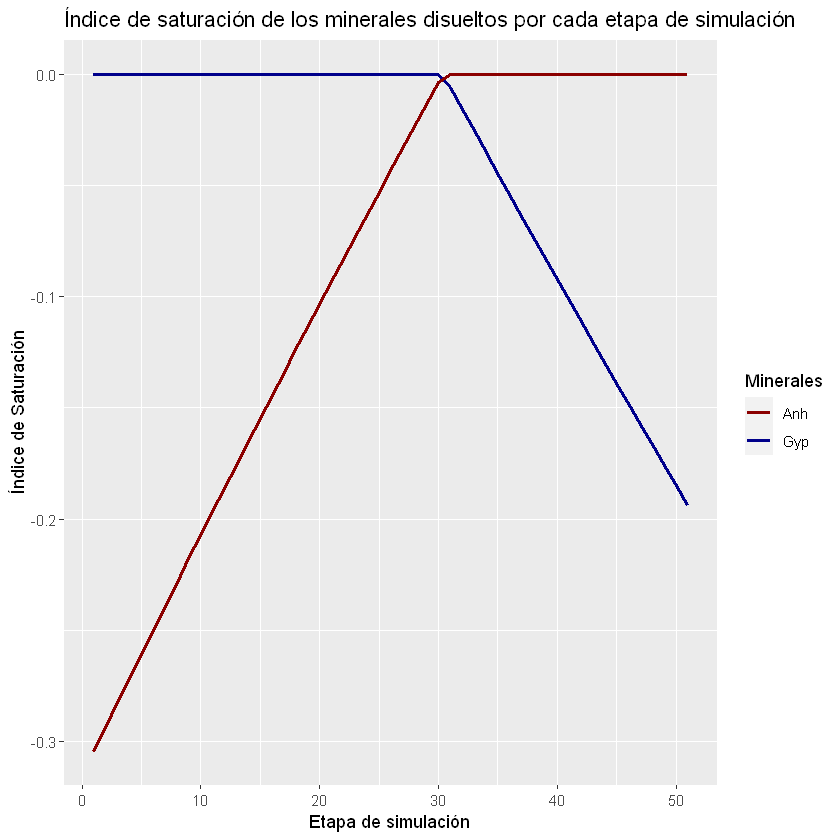

In [163]:
ggplot(so$n1[c(2:52),]) + 
       geom_line(mapping=aes(y=si_gypsum,x= step,color="Gyp"),size=1 ) +
       geom_line(mapping=aes(y=si_anhydrite,x= step,color="Anh"),size=1 ) +
       ggtitle("Índice de saturación de los minerales disueltos por cada etapa de simulación") +
       xlab("Etapa de simulación") +
       ylab("Índice de Saturación") +
      scale_color_manual(values = c(
          'Gyp' = 'darkblue',
          "Anh"="darkred"
      )) +
      labs(color = 'Minerales')

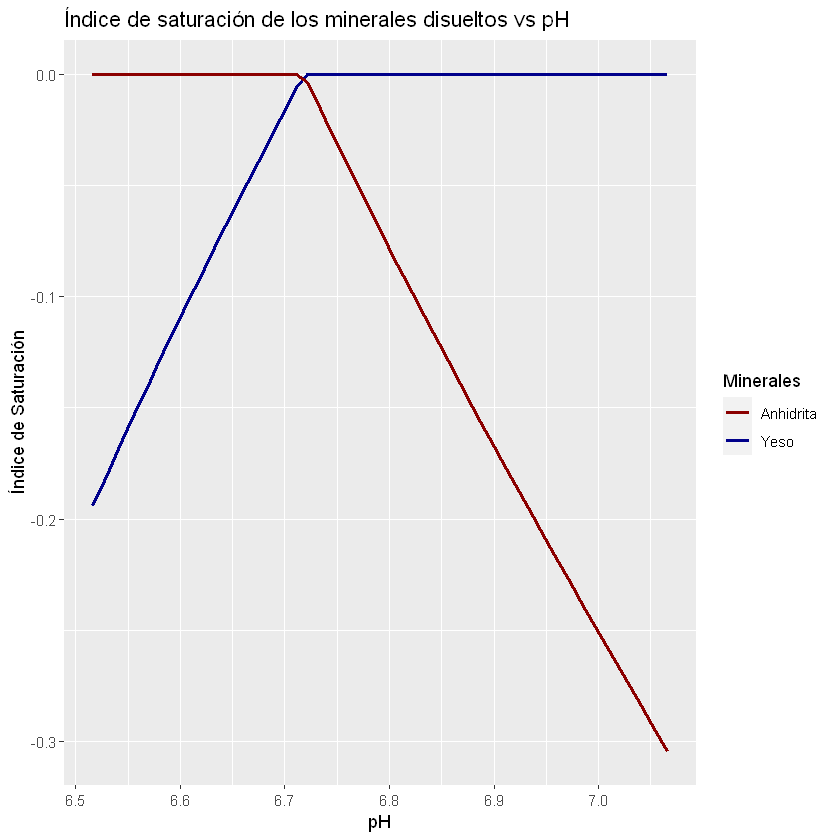

In [8]:
ggplot(so$n1[c(2:52),]) + 
       geom_line(mapping=aes(y=si_gypsum,x= pH,color="Yeso"),size=1 ) +
       geom_line(mapping=aes(y=si_anhydrite,x= pH,color="Anhidrita"),size=1 ) +
       ggtitle("Índice de saturación de los minerales disueltos vs pH") +
       xlab("pH") +
       ylab("Índice de Saturación") +
      scale_color_manual(values = c(
          'Yeso' = 'darkblue',
          "Anhidrita"="darkred"
      )) +
      labs(color = 'Minerales')

## Ejemplo 20 Distribución de isótopos entre agua y calcita

#### La base de datos iso.dat implementa el enfoque de las reacciones isotópicas descrito por Thorstenson y Parkhurst (2002, 2004), en el que los isótopos menores se tratan como componentes termodinámicos individuales. 

#### Las especies acuosas y sólidas de isótopos menores tienen constantes de equilibrio ligeramente diferentes a las de los isótopos principales, que explican los procesos de fraccionamiento. 

#### El tratamiento de isótopos en gases requiere una especie separada para cada variante isotópica de un gas; por ejemplo, las variantes isotópicas del dióxido de carbono son CO2, C18OO, C18O2, 13CO2, 13C18OO y 13C18O2. 

#### Del mismo modo, cada variante isotópica de un mineral debe incluirse como un componente de una solución sólida para representar completamente la composición isotópica del sólido. 

#### Las constantes de equilibrio en iso.dat se derivan de factores de fraccionamiento empíricos, de la teoría mecánica estadística o, cuando no hay datos disponibles (el caso más común), suponiendo que no hay fraccionamiento. 

#### Sin embargo, la base de datos se puede ampliar a medida que se disponga de datos termodinámicos isotópicos adicionales.

In [10]:
phrLoadDatabaseString(iso.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex20a)
phrGetOutputStrings()
so <- phrGetSelectedOutput()

str(so$n1)

[1] "------------------------------------"                                                   
  [2] "Reading input data for simulation 1."                                                   
  [3] "------------------------------------"                                                   
  [4] ""                                                                                       
  [5] "\tTITLE Example 20A.--Calculate carbonate solid solution"                                
  [6] "\tPRINT"                                                                                 
  [7] "\t\tcensor_species        1e-006"                                                         
  [8] "\tSOLUTION 1 # water to find composition of marine carbonate"                            
  [9] "\t\tpH      8.2"                                                                          
 [10] "\t\tNa\t1       charge"                                                                    
 [11] "\t\tCa\t10      Calcite        0"                                                          
 [12] "\t\tC\t2\t"                                                                                 
 [13] "\t\t[13C]\t0       # permil"                                                               
 [14] "\t\t[14C]\t0       # pmc"                                                                  
 [15] "\t\tD\t0       # permil"                                                                   
 [16] "\t\t[18O]\t0       # permil"                                                               
 [17] "\tEND"                                                                                   
 [18] "-----"                                                                                  
 [19] "TITLE"                                                                                  
 [20] "-----"                                                                                  
 [21] ""                                                                                       
 [22] " Example 20A.--Calculate carbonate solid solution"                                      
 [23] ""                                                                                       
 [24] "-------------------------------------------"                                            
 [25] "Beginning of initial solution calculations."                                            
 [26] "-------------------------------------------"                                            
 [27] ""                                                                                       
 [28] "Initial solution 1.\t"                                                                   
 [29] ""                                                                                       
 [30] "-----------------------------------Isotopes------------------------------------"        
 [31] ""                                                                                       
 [32] "   Isotope\t    Molality\t       Moles\t       Ratio\t       Units"                         
 [33] ""                                                                                       
 [34] "         H\t1.10997e+002\t1.10997e+002"                                                   
 [35] "         D\t1.72889e-002\t1.72889e-002\t0.00000e+000\t      permil"                         
 [36] "         T\t0.00000e+000\t0.00000e+000\t0.00000e+000\t          TU"                         
 [37] ""                                                                                       
 [38] "         C\t1.97789e-003\t1.97789e-003"                                                   
 [39] "     [13C]\t2.21132e-005\t2.21132e-005\t0.00000e+000\t      permil"                         
 [40] "     [14C]\t0.00000e+000\t0.00000e+000\t0.00000e+000\t         pmc"                         
 [41] ""                                                                                       
 [42] "    

 NULL


## Ejemplo 21 Difusión de modelado de HTO, 36Cl-, 22Na + y Cs + en una celda de difusión radial

#### Este ejemplo ilustra cómo PHREEQC puede simular un experimento de difusión, como se realiza ahora a menudo para evaluar las propiedades de un depósito de desechos nucleares en una formación de arcilla. 

#### Se corta una muestra de un núcleo de arcilla, se envuelve en filtros y se coloca en una celda de difusión (ver Van Loon y otros, 2004, para más detalles).

#### Las soluciones con trazadores se hacen circular en las superficies de los filtros, los trazadores se difunden dentro y fuera de la arcilla, y las soluciones se muestrean y analizan regularmente a tiempo. 

#### Los cambios de concentración se interpretan con las ecuaciones de difusión de Fick para obtener parámetros de transporte para modelar las tasas de migración de elementos fuera de un depósito de residuos. 

#### El transporte en las arcillas es principalmente difusivo debido a la baja conductividad hidráulica, y los solutos se retardan aún más por la absorción (cationes) y por la exclusión de parte del espacio poroso (aniones).

In [14]:
phrLoadDatabaseString(phreeqc.dat)
# el ejemplo 21 requiere que el archivo selected_output esté activado
phrSetSelectedOutputFileOn(1, TRUE)
phrSetOutputStringsOn(TRUE)
## No se ejecuta: phrRunString (ex21)
phrRunString (ex21)
phrGetOutputStrings()

[1] "------------------------------------"                                                                                                                                                                         
   [2] "Reading input data for simulation 1."                                                                                                                                                                         
   [3] "------------------------------------"                                                                                                                                                                         
   [4] ""                                                                                                                                                                                                             
   [5] "\tTITLE Diffusion through Opalinus Clay in a radial diffusion cell, Appelo, Van Loon and Wersin, 2010, GCA 74, 1201"                                                                                           
   [6] "\tKNOBS"                                                                                                                                                                                                       
   [7] "\t tolerance 1e-16"                                                                                                                                                                                            
   [8] "\tSOLUTION_MASTER_SPECIES"                                                                                                                                                                                     
   [9] "\t  Hto       Hto       0.0   20        20"                                                                                                                                                                    
  [10] "\t  Na_tr     Na_tr+    0.0   22        22"                                                                                                                                                                    
  [11] "\t  Cl_tr     Cl_tr-    0.0   36        36"                                                                                                                                                                    
  [12] "\t  Cs        Cs+       0.0  132.905   132.905"                                                                                                                                                                
  [13] "\tSOLUTION_SPECIES"                                                                                                                                                                                            
  [14] "\t  Hto = Hto"                                                                                                                                                                                                 
  [15] "\t        log_k 0"                                                                                                                                                                                             
  [16] "\t gamma 1e6 0"                                                                                                                                                                                                
  [17] "\t     dw 2.236e-9"                                                                                                                                                                                            
  [18] "\t  Na_tr+ = Na_tr+"                                                                                                                                                                                           
  [19] "\t  log_k 0"                                                                                                   

In [19]:
so <- phrGetSelectedOutput()

head(so$n1)

no_heading_1                                              
1 \nPRINT ; -reset false; -echo_input true; -user_print true
  no_heading_2                          no_heading_3                     
1 \n# filter cells at tracer-in side... \nSOLUTION 4; -water  1.3963e-003
  no_heading_4                                                                                                                        
1 \n pH 7.6; pe 14 O2(g) -1.0; temp 23\n Na 240; K 1.61; Mg 16.9; Ca 25.8; Sr 0.505\n Cl 300; S(6) 14.1; Fe(2) 0.0; Alkalinity 0.476\n
  no_heading_5                    no_heading_6                     
1 \n\n# cells in Opalinus Clay... \nSOLUTION 5; -water  7.7322e-005
  no_heading_7                                                                                                                      
1 \n pH 7.6; pe 14 O2(g) -1.0; temp 23\n Na 240; K 1.61; Mg 16.9; Ca 25.8; Sr 0.505\n Cl 300; S(6) 14.1; Fe(2) 0.0; Alkalinity 0.476
  no_heading_8           no_heading_9                               
1 \nSURFACE 5; -equil 5; \n Su_ 3.8224e-004 5.2840e+005  6.6087e-004
  no_heading_10        ...
1 \n Su_ii 7.4371e-006 ...
  no_heading_180                                       
1 \n 230 IF (cell_no < 5 OR cell_no > 15) THEN GOTO 400
  no_heading_181                                        
1 \n 240 y2 = SYS("Hto") / (tot("water") + edl("water"))
  no_heading_182                                   
1 \n 250 REM y2 = y2 / 1.4281e+001# conc / kg solid
  no_heading_183                                            
1 \n 260 plot_xy xval * 1e3, y2, symbol = Circle, y_axis = 2
  no_heading_184                       
1 \n 270 IF (cell_no > 6) THEN GOTO 400
  no_heading_185                                                             
1 \n 280 IF 1 THEN plot_xy 1.8000e+000, get(15), color = Black, symbol = None
  no_heading_186                                                             
1 \n 290 IF 1 THEN plot_xy 2.0620e+001, get(15), color = Black, symbol = None
  no_heading_187    no_heading_188       no_heading_189
1 \n 300 put(0, 15) \n 400 put(xval, 14) \nEND

## Ejemplo 22 Modelado de solubilidades de gas: CO2 a altas presiones

#### PHREEQC calcula el coeficiente de fugacidad con la ecuación de estado de Peng-Robinson (Peng y Robinson, 1976) a partir de la presión y temperatura críticas, y el factor acéntrico del gas en una mezcla de gases para obtener el volumen límite y el factor de atracción en el Van Der Waals ecuación.

#### El coeficiente de fugacidad es cercano a 1 cuando la presión total de la fase gaseosa es menor de aproximadamente 10 atm, y puede despreciarse en el cálculo de solubilidad. A presiones más altas, el efecto puede ser sustancial. A bajas presiones, la concentración de CO2 aumenta casi linealmente con la presión.

#### A 25 grados C y presiones superiores a 62 atm, la concentración aumenta más gradualmente porque el coeficiente de fugacidad cae rápidamente.

In [20]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex22)
phrGetOutputStrings()

[1] "------------------------------------"                                                                         
    [2] "Reading input data for simulation 1."                                                                         
    [3] "------------------------------------"                                                                         
    [4] ""                                                                                                             
    [5] "\tTITLE Example 22.--Compare experimental CO2 solubilities at high CO2 pressure "                              
    [6] "\t   with Peng-Robinson calc'ns with fixed-volume gas_phase, 25, 50, 75, 100 oC."                              
    [7] "\tSOLUTION 1"                                                                                                  
    [8] "\tGAS_PHASE 1"                                                                                                 
    [9] "\t    fixed_volume"                                                                                            
   [10] "\t    CO2(g) 0"                                                                                                
   [11] "\t    H2O(g) 0"                                                                                                
   [12] "\tREACTION"                                                                                                    
   [13] "\t CO2 1"                                                                                                      
   [14] "\t 0 27*1"                                                                                                     
   [15] "\tINCREMENTAL_REACTIONS true"                                                                                  
   [16] "\tUSER_GRAPH 1 Example 22, CO2 solubility at high pressures, 25 - 100C"                                        
   [17] "\t -plot_tsv_file co2.tsv"                                                                                     
   [18] "\t -axis_titles \"Pressure, in atmospheres\"               \"CO2 concentration, in moles per kilogram water\"" 
   [19] "\t -axis_scale x_axis 0 500"                                                                                   
   [20] "\t -axis_scale y_axis 0 2"                                                                                     
   [21] "\t -connect_simulations false"                                                                                 
   [22] "\t 10 graph_x PR_P(\"CO2(g)\")"                                                                                
   [23] "\t 20 graph_y TOT(\"C(4)\")"                                                                                   
   [24] "\t -end"                                                                                                       
   [25] "\tUSER_GRAPH 2 Example 22, P-Vm of CO2 gas, 25 - 100C"                                                         
   [26] "\t -headings 25C"                                                                                              
   [27] "\t -axis_titles \"Molar volume of CO2 gas, in liters per mole\"               \"CO2 pressure, in atmospheres\""
   [28] "\t -axis_scale x_axis 0 1"                                                                                     
   [29] "\t -axis_scale y_axis 0 500"                                                                                   
   [30] "\t -connect_simulations false"                                                                                 
   [31] "\t 10 plot_xy gas_vm, gas_p symbol = None"                                                                     
   [32] "\t -end"                                                                                                       
   [33] "\tEND"                                                                                                         
   [34] "-----"

In [21]:
so <- phrGetSelectedOutput()

head(so$n1)

NULL

## Ejemplo 3, parte A .-- Equilibrio de calcita en log Pco2 = -2.0 y 25C°.

#### Este ejemplo demuestra las capacidades de PHREEQC para realizar una serie de simulaciones geoquímicas, y las simulaciones finales se basan en los resultados de simulaciones anteriores dentro de la misma ejecución. 

#### El ejemplo investiga reacciones diagenéticas que pueden ocurrir en zonas donde el agua de mar se mezcla con el agua subterránea de carbonato. 

#### El ejemplo se divide en cinco simulaciones, etiquetadas desde la parte A hasta la parte E: 

#### (A) El agua subterránea de carbonato se configura equilibrando agua pura con calcita a una de 10-2,0 atm. 

#### (B) El agua de mar se define utilizando los datos de iones principales que se dan en la tabla 9 (Libro de PHREEQC). 

#### (C) Las dos soluciones se mezclan en proporciones de 70 por ciento de agua subterránea y 30 por ciento de agua de mar. 

#### (D) La mezcla se equilibra con calcita y dolomita. 

#### (E) La mezcla se equilibra con calcita solo para investigar la evolución química si se supone que la precipitación de dolomita es insignificante

In [23]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex3)
phrGetOutputStrings()

[1] "------------------------------------"                                                   
  [2] "Reading input data for simulation 1."                                                   
  [3] "------------------------------------"                                                   
  [4] ""                                                                                       
  [5] "\tTITLE Example 3, part A.--Calcite equilibrium at log Pco2 = -2.0 and 25C.        "     
  [6] "\tSOLUTION 1  Pure water"                                                                
  [7] "\t        pH      7.0"                                                                   
  [8] "\t        temp    25.0"                                                                  
  [9] "\tEQUILIBRIUM_PHASES"                                                                    
 [10] "\t        CO2(g)          -2.0    "                                                      
 [11] "\t        Calcite         0.0"                                                           
 [12] "\tSAVE solution 1"                                                                       
 [13] "\tEND"                                                                                   
 [14] "-----"                                                                                  
 [15] "TITLE"                                                                                  
 [16] "-----"                                                                                  
 [17] ""                                                                                       
 [18] " Example 3, part A.--Calcite equilibrium at log Pco2 = -2.0 and 25C.        "           
 [19] ""                                                                                       
 [20] "-------------------------------------------"                                            
 [21] "Beginning of initial solution calculations."                                            
 [22] "-------------------------------------------"                                            
 [23] ""                                                                                       
 [24] "Initial solution 1.\tPure water"                                                         
 [25] ""                                                                                       
 [26] "-----------------------------Solution composition------------------------------"        
 [27] ""                                                                                       
 [28] "\tElements           Molality       Moles"                                               
 [29] ""                                                                                       
 [30] "\tPure water     "                                                                       
 [31] ""                                                                                       
 [32] "----------------------------Description of solution----------------------------"        
 [33] ""                                                                                       
 [34] "                                       pH  =   7.000    "                               
 [35] "                                       pe  =   4.000    "                               
 [36] "      Specific Conductance (uS/cm,  25oC)  = 0"                                         
 [37] "                          Density (g/cm3)  =   0.99704"                                 
 [38] "                               Volume (L)  =   1.00297"                                 
 [39] "                        Activity of water  =   1.000"                                   
 [40] "                 Ionic strength (mol/kgw)  =  1.007e-007"                               
 [41] "                       Mass of water (kg)  =  1.000e+000"                               
 [42] "                 Total alkalinity (eq/kg)  =  1

In [24]:
so <- phrGetSelectedOutput()

head(so$n1)

NULL

## Ejemplo 4: Evaporación y reacciones redox homogéneas.

#### La evaporación se logra eliminando el agua del sistema químico. El agua se puede eliminar mediante varios métodos: 

#### (1) el agua se puede especificar como un reactivo irreversible con un coeficiente de reacción negativo en la entrada de la palabra clave REACTION. 

#### (2) la solución se puede mezclar con agua pura a la que se le da una fracción de mezcla negativa en MIX

#### (3) "H2O" se puede especificar como la reacción alternativa en la entrada de la palabra clave EQUILIBRIUM_PHASES, en cuyo caso se elimina o se añade agua a la fase acuosa para alcanzar el equilibrio con una fase especificada.

#### Este ejemplo usa el primer método; El bloque de datos REACTION se usa para simular la concentración de agua de lluvia en aproximadamente 20 veces al eliminar el 95 por ciento del agua.

#### La solución resultante contiene solo alrededor de 0.05 kg de agua.

#### En una simulación posterior, la palabra clave MIX se utiliza para generar una solución que tiene las mismas concentraciones que la solución evaporada, pero tiene una masa total de agua de aproximadamente 1 kg.


In [27]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex4)
phrGetOutputStrings()

[1] "------------------------------------"                                                   
  [2] "Reading input data for simulation 1."                                                   
  [3] "------------------------------------"                                                   
  [4] ""                                                                                       
  [5] "\tTITLE Example 4a.--Rainwater evaporation"                                              
  [6] "\tSOLUTION 1  Precipitation from Central Oklahoma"                                       
  [7] "\t        units           mg/L"                                                          
  [8] "\t        pH              4.5   # estimated"                                             
  [9] "\t        temp            25.0"                                                          
 [10] "\t        Ca              .384"                                                          
 [11] "\t        Mg              .043"                                                          
 [12] "\t        Na              .141"                                                          
 [13] "\t        K               .036"                                                          
 [14] "\t        Cl              .236"                                                          
 [15] "\t        C(4)            .1      CO2(g)  -3.5"                                          
 [16] "\t        S(6)            1.3"                                                           
 [17] "\t        N(-3)           .208"                                                          
 [18] "\t        N(5)            .237"                                                          
 [19] "\tREACTION 1"                                                                            
 [20] "\t        H2O     -1.0"                                                                  
 [21] "\t        52.73 moles"                                                                   
 [22] "\tSAVE solution 2"                                                                       
 [23] "\tEND"                                                                                   
 [24] "-----"                                                                                  
 [25] "TITLE"                                                                                  
 [26] "-----"                                                                                  
 [27] ""                                                                                       
 [28] " Example 4a.--Rainwater evaporation"                                                    
 [29] ""                                                                                       
 [30] "-------------------------------------------"                                            
 [31] "Beginning of initial solution calculations."                                            
 [32] "-------------------------------------------"                                            
 [33] ""                                                                                       
 [34] "Initial solution 1.\tPrecipitation from Central Oklahoma"                                
 [35] ""                                                                                       
 [36] "-----------------------------Solution composition------------------------------"        
 [37] ""                                                                                       
 [38] "\tElements           Molality       Moles"                                               
 [39] ""                                                                                       
 [40] "\tC(4)             1.091e-005  1.091e-005  Equilibrium with CO2(g)"                      
 [41] "\tCa               9.581e-006  9.581e-006"                                               
 [42] "\tCl               6.657e-006  6.657

In [28]:
so <- phrGetSelectedOutput()

head(so$n1)

NULL

## Ejemplo 5 Reacciones irreversibles

#### Este ejemplo demuestra las capacidades de reacción irreversibles de PHREEQC en el modelado de la oxidación de pirita. 

#### Se añaden irreversiblemente oxígeno (O2) y NaCl al agua pura en seis cantidades (0,0, 0,001, 0,005, 0,01, 0,03 y 0,05 mol); la proporción relativa de O2 a NaCl en la reacción irreversible es de 1,0 a 0,5. 

#### Se deja que la pirita, la calcita y la goetita se disuelvan hasta el equilibrio y la presión parcial de dióxido de carbono se mantiene a 10-3,5 (presión parcial atmosférica). Además, se permite que el yeso se precipite si se sobresatura.

In [30]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex5)
phrGetOutputStrings()

[1] "------------------------------------"                                                                             
   [2] "Reading input data for simulation 1."                                                                             
   [3] "------------------------------------"                                                                             
   [4] ""                                                                                                                 
   [5] "\tTITLE Example 5.--Add oxygen, equilibrate with pyrite, calcite, and goethite."                                   
   [6] "\tSOLUTION 1  PURE WATER"                                                                                          
   [7] "\t        pH      7.0"                                                                                             
   [8] "\t        temp    25.0"                                                                                            
   [9] "\tEQUILIBRIUM_PHASES 1"                                                                                            
  [10] "\t        Pyrite          0.0"                                                                                     
  [11] "\t        Goethite        0.0"                                                                                     
  [12] "\t        Calcite         0.0"                                                                                     
  [13] "\t        CO2(g)         -3.5"                                                                                     
  [14] "\t        Gypsum          0.0     0.0"                                                                             
  [15] "\tREACTION 1"                                                                                                      
  [16] "\t        O2      1.0"                                                                                             
  [17] "\t        NaCl    0.5"                                                                                             
  [18] "\t        0.0     0.001   0.005   0.01   0.03   0.05"                                                              
  [19] "\tSELECTED_OUTPUT"                                                                                                 
  [20] "\t        file   ex5.sel"                                                                                          
  [21] "\t        totals  Cl"                                                                                              
  [22] "\t        si     Gypsum"                                                                                           
  [23] "\t        equilibrium_phases  pyrite goethite calcite CO2(g) gypsum"                                               
  [24] "\tUSER_GRAPH Example 5"                                                                                            
  [25] "\t        -headings Pyrite Goethite Calcite CO2(g) Gypsum SI_Gypsum"                                               
  [26] "\t        -chart_title \"Pyrite Oxidation\""                                                                       
  [27] "\t        -axis_titles \"O2 added, in millimoles\" \"Millimoles dissolved\"              \"Saturation index\""     
  [28] "\t  10 x = RXN * 1e3"                                                                                              
  [29] "\t  20 PLOT_XY x, 1e3 * (10 - EQUI(\"Pyrite\")), symbol = Plus"                                                    
  [30] "\t  30 PLOT_XY x, 1e3 * (10 - EQUI(\"Goethite\")), symbol = Plus"                                                  
  [31] "\t  40 PLOT_XY x, 1e3 * (10 - EQUI(\"Calcite\")), symbol = Plus"                                                   
  [32] "\t  50 PLOT_XY x, 1e3 * (10 - EQUI(\"CO2(g)\")), symbol = Plus"                                                    
  [33] "\t  60 PLOT_XY x, 1e3 * (-EQUI(

In [33]:
so <- phrGetSelectedOutput()

so

$n1
  sim  state soln dist_x time step       pH        pe  Cl.mol.kgw.    pyrite
1   1 i_soln    1     NA   NA   NA 7.000000  4.000000 0.0000000000  0.000000
2   1  react    1     NA    0    1 8.279213 -4.942858 0.0000000000 10.000000
3   1  react    1     NA    0    2 8.170314 -4.285634 0.0005000046  9.999733
4   1  react    1     NA    0    3 7.979566 -3.966426 0.0025000418  9.998667
5   1  react    1     NA    0    4 7.880798 -3.812112 0.0050001396  9.997333
6   1  react    1     NA    0    5 7.725164 -3.573319 0.0150011261  9.992000
7   1  react    1     NA    0    6 7.719743 -3.566198 0.0250117229  9.986667
       d_pyrite goethite   d_goethite  calcite     d_calcite    CO2.g.
1  0.000000e+00  0.00000 0.000000e+00 0.000000  0.0000000000  0.000000
2 -3.143850e-08 10.00000 1.096542e-08 9.999507 -0.0004933804  9.999513
3 -2.666679e-04 10.00027 2.666579e-04 9.999073 -0.0009269133 10.000143
4 -1.333335e-03 10.00133 1.333314e-03 9.997064 -0.0029359856 10.002396
5 -2.666669e-03 10.00267 2.666634e-03 9.994442 -0.0055578584 10.005107
6 -8.000006e-03 10.00800 7.999924e-03 9.983826 -0.0161738017 10.015823
7 -1.333334e-02 10.01333 1.333325e-02 9.973158 -0.0268415347 10.026489
       d_CO2.g.    gypsum  d_gypsum   si_Gypsum
1  0.0000000000 0.0000000 0.0000000          NA
2 -0.0004869186 0.0000000 0.0000000 -6.12546442
3  0.0001425474 0.0000000 0.0000000 -2.01310929
4  0.0023964777 0.0000000 0.0000000 -1.04999422
5  0.0051068732 0.0000000 0.0000000 -0.63381545
6  0.0158232187 0.0000000 0.0000000 -0.01178259
7  0.0264889848 0.0095906 0.0095906  0.00000000

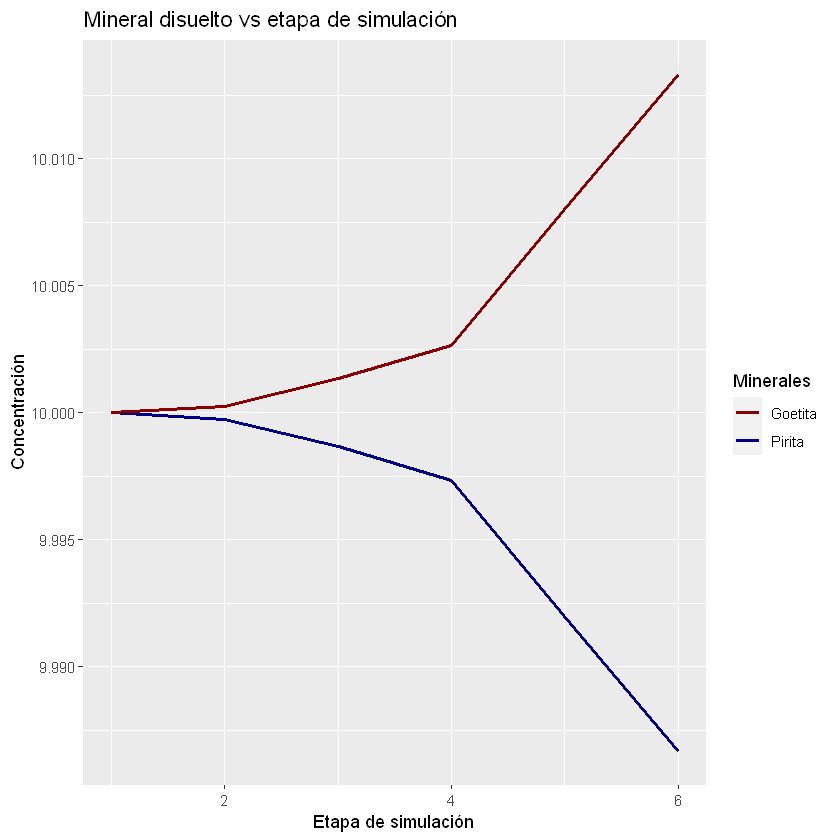

In [37]:
ggplot(so$n1[c(2:7),]) + 
       geom_line(mapping=aes(y=pyrite,x= step,color="Pirita"),size=1 ) +
       geom_line(mapping=aes(y=goethite,x= step,color="Goetita"),size=1 ) +
       ggtitle("Mineral disuelto vs etapa de simulación") +
       xlab("Etapa de simulación") +
       ylab("Concentración") +
      scale_color_manual(values = c(
          'Pirita' = 'darkblue',
          "Goetita"="darkred"
      )) +
      labs(color = 'Minerales')

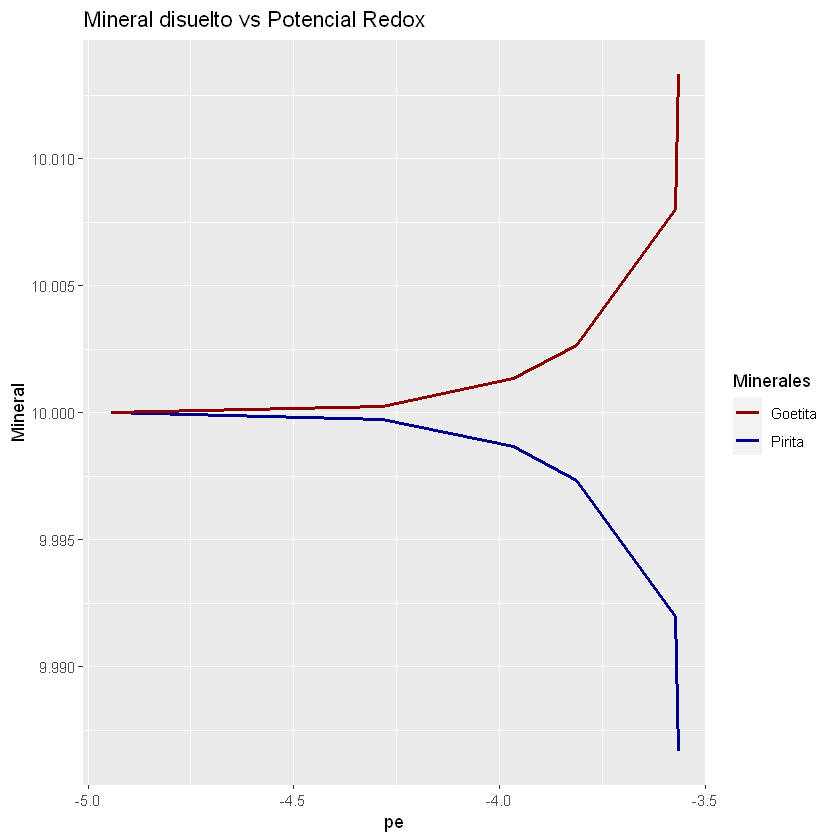

In [38]:
ggplot(so$n1[c(2:7),]) + 
       geom_line(mapping=aes(y=pyrite,x= pe,color="Pirita"),size=1 ) +
       geom_line(mapping=aes(y=goethite,x= pe,color="Goetita"),size=1 ) +
       ggtitle("Mineral disuelto vs Potencial Redox") +
       xlab("pe") +
       ylab("Mineral") +
      scale_color_manual(values = c(
          'Pirita' = 'darkblue',
          "Goetita"="darkred"
      )) +
      labs(color = 'Minerales')

## Ejemplo 6  Cálculos de la ruta de reacción

#### En este ejemplo, se investiga la precipitación de fases como resultado de la disolución incongruente de feldespato K (microclina). Sólo se consideran las cuatro fases abordadas originalmente por Helgeson y otros (1969): feldespato K, gibbsita, caolinita y mica K (moscovita).

#### Los datos termodinámicos para las fases (palabra clave PHASES) se derivan de Robie y otros (1978) y son los mismos que para el problema de prueba 5 en el manual PHREEQE (Parkhurst y otros, 1980).

In [39]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex6)
phrGetOutputStrings()

[1] "------------------------------------"                                                                                                                                                                                         
   [2] "Reading input data for simulation 1."                                                                                                                                                                                         
   [3] "------------------------------------"                                                                                                                                                                                         
   [4] ""                                                                                                                                                                                                                             
   [5] "\tTITLE Simulation 6A.--React to phase boundaries."                                                                                                                                                                            
   [6] "\tSOLUTION 1  PURE WATER"                                                                                                                                                                                                      
   [7] "\t            pH    7.0 charge"                                                                                                                                                                                                
   [8] "\t          temp   25.0"                                                                                                                                                                                                       
   [9] "\tPHASES"                                                                                                                                                                                                                      
  [10] "\t        Gibbsite"                                                                                                                                                                                                            
  [11] "\t                Al(OH)3 + 3 H+ = Al+3 + 3 H2O"                                                                                                                                                                               
  [12] "\t                log_k          8.049"                                                                                                                                                                                        
  [13] "\t                delta_h        -22.792 kcal"                                                                                                                                                                                 
  [14] "\t        Kaolinite"                                                                                                                                                                                                           
  [15] "\t                Al2Si2O5(OH)4 + 6 H+ = H2O + 2 H4SiO4 + 2 Al+3"                                                                                                                                                              
  [16] "\t                log_k          5.708"                                                                                                                                                                                        
  [17] "\t                delta_h        -35.306 kcal"                                                                                                                                                                                 
  [18] "\t        K-mica"                                      

In [43]:
so <- phrGetSelectedOutput()

head(so$n1)

sim state  soln dist_x time step pH       pe        la_K.     la_H.     ...
1 1   i_soln 1    NA     NA   NA   6.997376  4.000000        NA -6.997376 ...
2 2   react  1    NA      0    1   7.003692 10.367928 -7.575650 -7.003692 ...
3 3   react  1    NA      0    1   8.208839  9.162778 -5.662620 -8.208839 ...
4 4   react  1    NA      0    1   9.107062  8.264513 -4.699063 -9.107062 ...
5 5   react  1    NA      0    1   9.388114  7.983418 -3.900875 -9.388114 ...
6 6   react  1    NA      0    1   8.350632  9.020984 -5.520231 -8.350632 ...
  K.mica       d_K.mica      K.feldspar d_K.feldspar  si_Gibbsite  
1 0.000000e+00  0.000000e+00 0.000000    0.0000000000            NA
2 0.000000e+00  0.000000e+00 0.000000    0.0000000000  1.776357e-15
3 0.000000e+00  0.000000e+00 0.000000    0.0000000000 -5.329071e-15
4 9.999980e+00 -2.010068e-05 0.000000    0.0000000000 -7.300345e-01
5 6.361569e-05  6.361569e-05 9.999809   -0.0001909068 -2.001504e+00
6 0.000000e+00  0.000000e+00 0.000000    0.0000000000 -3.552714e-15
  si_Kaolinite  si_K.mica     si_K.feldspar pH.log.K. log.H4SiO4.
1            NA            NA            NA NA        NA         
2 -3.807986e+00 -1.069194e+01 -1.469494e+01 NA        NA         
3 -1.065814e-14 -1.861781e+00 -5.864781e+00 NA        NA         
4 -3.552714e-15 -3.552714e-15 -2.542932e+00 NA        NA         
5 -7.194965e-01  5.329071e-15  2.664535e-15 NA        NA         
6 -1.065814e-14 -1.577599e+00 -5.580599e+00 NA        NA

## Ejemplo 7 Cálculos en fase gaseosa

#### Este ejemplo demuestra las capacidades de PHREEQC para modelar la evolución de composiciones gaseosas en equilibrio con una solución con una presión fija (total) o un volumen fijo de la fase gaseosa. 

#### En el caso de una fase gaseosa de presión fija, se forma una burbuja de gas tan pronto como la suma de las presiones parciales de los gases componentes excede la presión especificada de la fase gaseosa.

#### Una vez que se forma la burbuja, su volumen y composición variarán con el alcance de las reacciones. Este caso se aplica a las burbujas de gas que se forman en aguas superficiales o subterráneas a una profundidad determinada, donde la presión total es constante. 

#### Con una fase gaseosa de volumen fijo, la solución acuosa está en contacto con un espacio superior de volumen fijo, lo que es típico de un experimento de laboratorio con una botella cerrada. 

#### La fase gaseosa siempre existe en este espacio de cabeza, pero su presión y composición variarán con las reacciones. Otra forma de modelar las reacciones gas-líquido en PHREEQC es mantener una presión parcial fija mediante el bloque de datos EQUILIBRIUM_PHASES. Este enfoque de presión parcial fija se ilustra en este ejemplo fijando la presión de CO2 por el comando SOLUTION

In [44]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex7)
phrGetOutputStrings()

[1] "------------------------------------"                                                                                                         
   [2] "Reading input data for simulation 1."                                                                                                         
   [3] "------------------------------------"                                                                                                         
   [4] ""                                                                                                                                             
   [5] "\tTITLE Example 7.--Organic decomposition with fixed-pressure and"                                                                             
   [6] "\t                  fixed-volume gas phases"                                                                                                   
   [7] "\tSOLUTION_MASTER_SPECIES"                                                                                                                     
   [8] "\tN(-3)    NH4+           0.0     N"                                                                                                           
   [9] "\tSOLUTION_SPECIES"                                                                                                                            
  [10] "\tNH4+ = NH3 + H+"                                                                                                                             
  [11] "\t        log_k           -9.252"                                                                                                              
  [12] "\t        delta_h 12.48   kcal"                                                                                                                
  [13] "\t        analytical_expression    0.6322    -0.001225     -2835.76"                                                                           
  [14] "\tNO3- + 10 H+ + 8 e- = NH4+ + 3 H2O"                                                                                                          
  [15] "\t        log_k           119.077"                                                                                                             
  [16] "\t        delta_h -187.055        kcal"                                                                                                        
  [17] "\t        gamma    2.5000    0.0000"                                                                                                           
  [18] "\tPHASES"                                                                                                                                      
  [19] "\tNH3(g)"                                                                                                                                      
  [20] "\t        NH3 = NH3"                                                                                                                           
  [21] "\t        log_k           1.770"                                                                                                               
  [22] "\t        delta_h -8.170  kcal"                                                                                                                
  [23] "\tSOLUTION 1"                                                                                                                                  
  [24] "\tEQUILIBRIUM_PHASES 1"                                                                                                                        
  [25] "\t        Calcite"                                                                                                                             
  [26] "\t        CO2(g)  -1.5"                                                                                                                        
  [27] "\tSAVE solution 1"                             

In [48]:
so <- phrGetSelectedOutput()

str(so$n1)

'data.frame':	27 obs. of  14 variables:
 $ sim      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ state    : chr  "i_soln" "react" "react" "react" ...
 $ reaction : num  NA NA 0.001 0.002 0.003 0.004 0.008 0.016 0.032 0.064 ...
 $ si_CO2.g.: num  NA -1.5 -1.35 -1.25 -1.16 ...
 $ si_CH4.g.: num  NA -21.5495 -0.4983 -0.1973 -0.0212 ...
 $ si_N2.g. : num  NA NA -3.98 -3.73 -3.6 ...
 $ si_NH3.g.: num  NA NA -8.38 -8.18 -8.09 ...
 $ pressure : num  0 0 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ total.mol: num  0 0 0 0 0 ...
 $ volume   : num  0 0 0 0 0 ...
 $ g_CO2.g. : num  0 0 0 0 0 ...
 $ g_CH4.g. : num  0 0 0 0 0 ...
 $ g_N2.g.  : num  0 0 0 0 0 ...
 $ g_NH3.g. : num  0 0 0 0 0 0 0 0 0 0 ...


Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


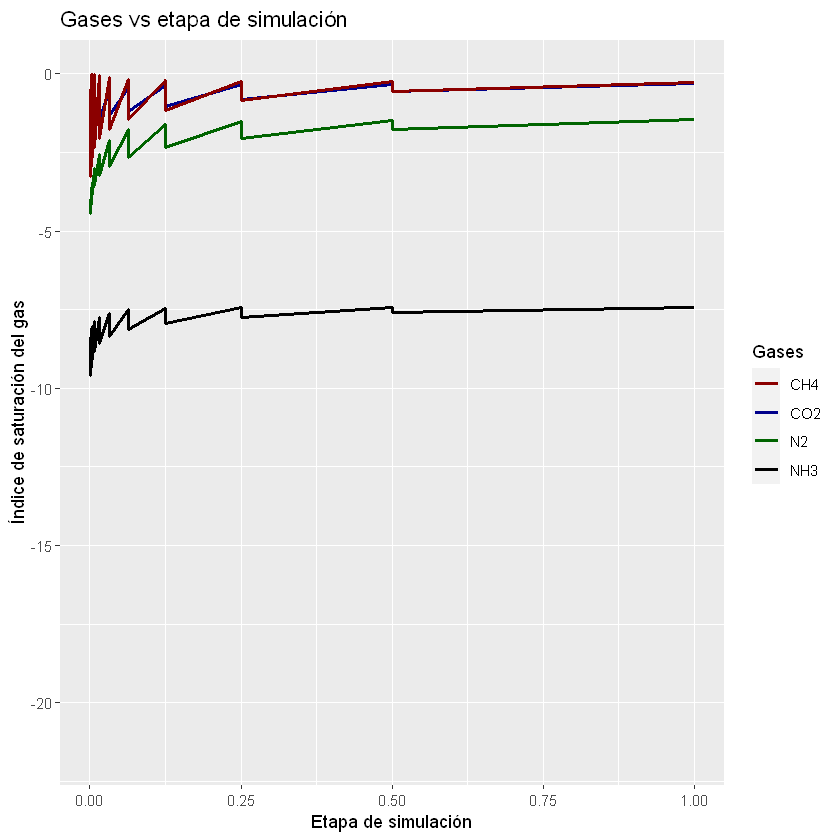

In [49]:
ggplot(so$n1[c(2:27),]) + 
       geom_line(mapping=aes(y=si_CO2.g.,x= reaction,color="CO2"),size=1 ) +
       geom_line(mapping=aes(y=si_CH4.g.,x= reaction,color="CH4"),size=1 ) +
       geom_line(mapping=aes(y=si_N2.g.,x= reaction,color="N2"),size=1 ) +
       geom_line(mapping=aes(y=si_NH3.g.,x= reaction,color="NH3"),size=1 ) +
       ggtitle("Gases vs etapa de simulación") +
       xlab("Etapa de simulación") +
       ylab("Índice de saturación del gas") +
      scale_color_manual(values = c(
          'CO2' = 'darkblue',
          "CH4"="darkred",
          "N2"="darkgreen",
          "NH3"="black"
      )) +
      labs(color = 'Gases')

## Ejemplo 8 Complejación superficial

#### En todos los modelos de complejación de superficies, la sorción es una función tanto de la energía química como de la electrostática, como se describe en la relación de energía libre. 

#### La sorción es más fuerte cuando la energía de Gibbs disminuye. Así, un contraión que porta una carga opuesta a la carga superficial tiende a ser absorbido electrostáticamente, mientras que un coión que porta una carga con el mismo signo que la superficie tiende a ser rechazado.

In [51]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
# el ejemplo 8 requiere que el archivo selected_output esté activado
phrSetSelectedOutputFileOn(1, TRUE)
phrRunString(ex8)
phrGetOutputStrings()
# limpiar
unlink(c("ex8.sel", "Zn1e_7", "Zn1e_4"))

[1] "------------------------------------"                                                      
   [2] "Reading input data for simulation 1."                                                      
   [3] "------------------------------------"                                                      
   [4] ""                                                                                          
   [5] "\tTITLE Example 8.--Sorption of zinc on hydrous iron oxides."                               
   [6] "\tSURFACE_SPECIES"                                                                          
   [7] "\t     Hfo_sOH  + H+ = Hfo_sOH2+"                                                           
   [8] "\t     log_k  7.18"                                                                         
   [9] "\t     Hfo_sOH = Hfo_sO- + H+"                                                              
  [10] "\t     log_k  -8.82"                                                                        
  [11] "\t     Hfo_sOH + Zn+2 = Hfo_sOZn+ + H+"                                                     
  [12] "\t     log_k  0.66"                                                                         
  [13] "\t     Hfo_wOH  + H+ = Hfo_wOH2+"                                                           
  [14] "\t     log_k  7.18"                                                                         
  [15] "\t     Hfo_wOH = Hfo_wO- + H+"                                                              
  [16] "\t     log_k  -8.82"                                                                        
  [17] "\t     Hfo_wOH + Zn+2 = Hfo_wOZn+ + H+"                                                     
  [18] "\t     log_k  -2.32"                                                                        
  [19] "\tSURFACE 1"                                                                                
  [20] "\t     Hfo_sOH        5e-6    600.    0.09"                                                 
  [21] "\t     Hfo_wOH        2e-4"                                                                 
  [22] "\tEND"                                                                                      
  [23] "-----"                                                                                     
  [24] "TITLE"                                                                                     
  [25] "-----"                                                                                     
  [26] ""                                                                                          
  [27] " Example 8.--Sorption of zinc on hydrous iron oxides."                                     
  [28] ""                                                                                          
  [29] "------------------"                                                                        
  [30] "End of simulation."                                                                        
  [31] "------------------"                                                                        
  [32] ""                                                                                          
  [33] "------------------------------------"                                                      
  [34] "Reading input data for simulation 2."                                                      
  [35] "------------------------------------"                                                      
  [36] ""                                                                                          
  [37] "\tSOLUTION 1"                                                                               
  [38] "\t     units  mmol/kgw"                                                                     
  [39] "\t     pH      8.0"                                                                         
  [40] "\t     Zn      0.0001 "                                                   

In [56]:
so <- phrGetSelectedOutput()

so$n1[c(1:20),]

no_heading_1                                                                                  
1  \nUSE solution 1; USE surface 1\nEQUILIBRIUM_PHASES 1\n   Fix_H+           -5 NaOH 10.0\nEND\n
2  \nUSE solution 2; USE surface 1\nEQUILIBRIUM_PHASES 1\n   Fix_H+           -5 NaOH 10.0\nEND\n
3                                                                                                
4                                                                                                
5                                                                                                
6                                                                                                
7                                                                                                
8                                                                                                
9                                                                                                
10                                                                                               
11                                                                                               
12                                                                                               
13                                                                                               
14                                                                                               
15                                                                                               
16                                                                                               
17                                                                                               
18                                                                                               
19                                                                                               
20                                                                                               
   no_heading_2                                                                                  
1  \nUSE solution 1; USE surface 1\nEQUILIBRIUM_PHASES 1\n   Fix_H+ -5.2500e+000 NaOH 10.0\nEND\n
2  \nUSE solution 2; USE surface 1\nEQUILIBRIUM_PHASES 1\n   Fix_H+ -5.2500e+000 NaOH 10.0\nEND\n
3                                                                                                
4                                                                                                
5                                                                                                
6                                                                                                
7                                                                                                
8                                                                                                
9                                                                                                
10                                                                                               
11                                                                                               
12                                                                                               
13                                                                                               
14                                                                                               
15                                                                                               
16                                                                                               
17                                                                                               
18                                                                                               
19                                                                                 

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


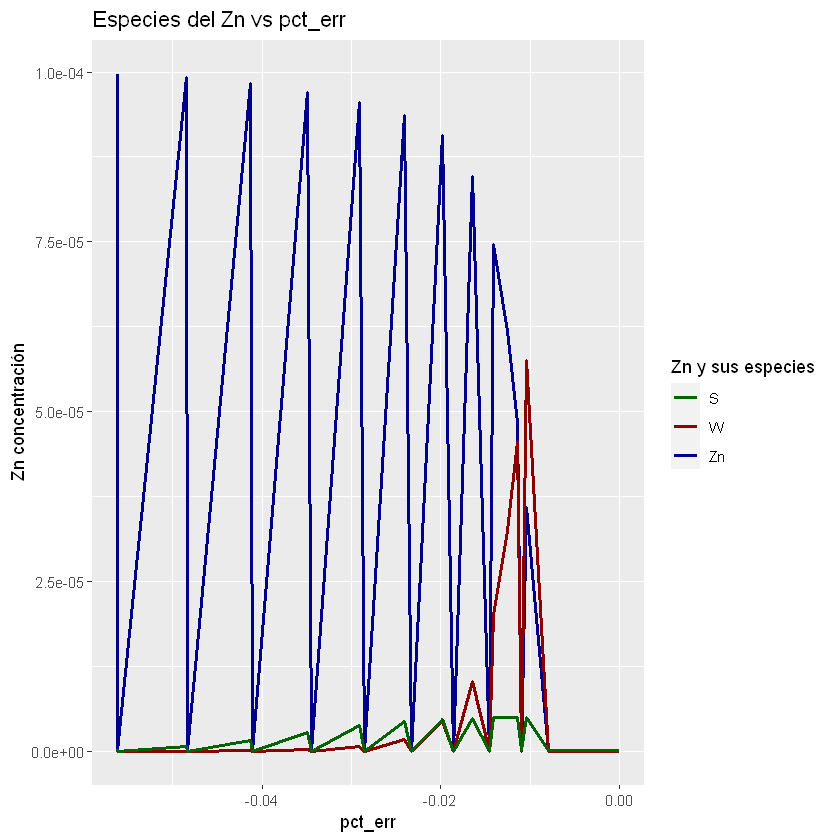

In [55]:
ggplot(so$n1[c(2:27),]) + 
       geom_line(mapping=aes(y=m_Zn.2.mol.kgw.,x= pct_err,color="Zn"),size=1 ) +
       geom_line(mapping=aes(y=m_Hfo_wOZn..mol.kgw.,x= pct_err,color="W"),size=1 ) +
       geom_line(mapping=aes(y=m_Hfo_sOZn..mol.kgw.,x= pct_err,color="S"),size=1 ) +
       ggtitle("Especies del Zn vs pct_err") +
       xlab("pct_err") +
       ylab("Zn concentración") +
      scale_color_manual(values = c(
          'Zn' = 'darkblue',
          "W"="darkred",
          "S"="darkgreen"
      )) +
      labs(color = 'Zn y sus especies')

## Ejemplo 9 Oxidación cinéticamente controlada de ferrosos

#### Las expresiones de velocidad cinética se pueden definir de una manera completamente general en PHREEQC utilizando declaraciones básicas en el bloque de datos RATES.

#### Las expresiones de velocidad se pueden utilizar en cálculos de transporte y reacción por lotes con el bloque de datos KINETICS.

#### Para los cálculos de transporte (ADVECCIÓN o TRANSPORTE), las reacciones cinéticas se pueden definir celda por celda por el rango de números que sigue a la palabra clave KINETICS (KINETICS m-n). 

#### Las expresiones de velocidad se integran con un algoritmo de Runge-Kutta-Fehlberg de 5º orden incrustado (hasta) o con un solucionador rígido de varios pasos de orden variable y paso variable (Cohen y Hindmarsh, 1996). 

#### El equilibrio se calcula antes de que se inicie un cálculo cinético y nuevamente cuando se agrega un incremento de reacción cinética. 

#### El equilibrio incluye el equilibrio de especies en solución; equilibrio de intercambio, de fase de equilibrio, de solución sólida y de ensamblaje superficial; y equilibrio en fase gaseosa. 

#### Se realiza una verificación para garantizar que la diferencia entre las estimaciones de la tasa integrada durante un intervalo de tiempo sea menor que una tolerancia definida por el usuario. 

#### Si no se cumple la tolerancia, la integración en el intervalo de tiempo se reinicia automáticamente con un intervalo de tiempo menor.

In [58]:
phrLoadDatabaseString(phreeqc.dat)
phrSetOutputStringsOn(TRUE)
phrRunString(ex9)
phrGetOutputStrings()

[1] "------------------------------------"                                                                               
   [2] "Reading input data for simulation 1."                                                                               
   [3] "------------------------------------"                                                                               
   [4] ""                                                                                                                   
   [5] "\tTITLE Example 9.--Kinetically controlled oxidation of ferrous "                                                    
   [6] "\t                  iron. Decoupled valence states of iron."                                                         
   [7] "\tSOLUTION_MASTER_SPECIES"                                                                                           
   [8] "\tFe_di              Fe_di+2    0.0     Fe_di              55.847"                                                   
   [9] "\tFe_tri             Fe_tri+3   0.0     Fe_tri             55.847"                                                   
  [10] "\tSOLUTION_SPECIES"                                                                                                  
  [11] "\tFe_di+2 = Fe_di+2"                                                                                                 
  [12] "\t        log_k   0.0"                                                                                               
  [13] "\tFe_tri+3 = Fe_tri+3"                                                                                               
  [14] "\t        log_k   0.0"                                                                                               
  [15] "\tFe_di+2 + H2O = Fe_diOH+ + H+"                                                                                     
  [16] "\t        log_k   -9.5"                                                                                              
  [17] "\t        delta_h 13.20   kcal"                                                                                      
  [18] "\tFe_di+2 + Cl- = Fe_diCl+"                                                                                          
  [19] "\t        log_k   0.14"                                                                                              
  [20] "\tFe_di+2 + CO3-2 = Fe_diCO3"                                                                                        
  [21] "\t        log_k   4.38"                                                                                              
  [22] "\tFe_di+2 + HCO3- = Fe_diHCO3+"                                                                                      
  [23] "\t        log_k   2.0"                                                                                               
  [24] "\tFe_di+2 + SO4-2 = Fe_diSO4"                                                                                        
  [25] "\t        log_k   2.25"                                                                                              
  [26] "\t        delta_h 3.230   kcal"                                                                                      
  [27] "\tFe_di+2 + HSO4- = Fe_diHSO4+"                                                                                      
  [28] "\t        log_k   1.08"                                                                                              
  [29] "\tFe_di+2 + 2HS- = Fe_di(HS)2"                                                                                       
  [30] "\t        log_k   8.95"                                                                                              
  [31] "\tFe_di+2 + 3HS- = Fe_di(HS)3-"                                                                                      
  [32] "\t        log_k   10.987"                                                                    

# ===============================================================